<h1> Initialisation Cell</h1>

In [3]:
import numpy as np
import pandas as pd
import re
from datetime import date
import matplotlib.pyplot as plt
import seaborn as sns
import math

<h1> Importing the Data</h1>

In [4]:
dataset = pd.read_csv("logbook_assignment1.csv")
#dataset.info()
#display(dataset)

/home/william/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (3,6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


<h1>Helper Functions</h1>

In [5]:
def currency(cost):
    cost=str(cost)
    for i in range(len(cost)):
        if cost[i].isnumeric():
            return cost[:i]
    return None

def to_num(number):
        num=number.replace(",","")
        return num

def float_val(cost):
    cost=str(cost)
    for i in range(len(cost)):
        if cost[i].isnumeric():
            return float(to_num(cost[i:]))
    return np.nan

def car(url):
    url=str(url)
    url=url[28:]
    lists=url.split("/")    
    if (len(lists)!=5):
        return lists[0]
    else:
        return lists[1]

def model(url):
    url=str(url)
    url=url[28:]
    lists=url.split("/")
    if(len(lists) == 3):
        return None
    elif (len(lists)==4):
        return lists[1]
    else:
        return lists[2]
                   
                   
def userID(url):
    url=str(url)
    url=url[28:]
    lists=url.split("/")
    if(len(lists) == 3):
        return lists[2]
    if (len(lists)==4):
        return lists[3]
    else:
        return lists[4]
    
    
    

<h1>Data Cleaning</h1>

<h2>1.date_fueled</h2>

In [6]:
dataset["date_fueled"] = dataset["date_fueled"].str.replace(" ","-")
dataset["date_fueled"] = dataset["date_fueled"].str.replace("Jan","01")
dataset["date_fueled"] = dataset["date_fueled"].str.replace("Feb","02")
dataset["date_fueled"] = dataset["date_fueled"].str.replace("Mar","03")
dataset["date_fueled"] = dataset["date_fueled"].str.replace("Apr","04")
dataset["date_fueled"] = dataset["date_fueled"].str.replace("May","05")
dataset["date_fueled"] = dataset["date_fueled"].str.replace("Jun","06")
dataset["date_fueled"] = dataset["date_fueled"].str.replace("Jul","07")
dataset["date_fueled"] = dataset["date_fueled"].str.replace("Aug","08")
dataset["date_fueled"] = dataset["date_fueled"].str.replace("Sep","09")
dataset["date_fueled"] = dataset["date_fueled"].str.replace("Oct","10")
dataset["date_fueled"] = dataset["date_fueled"].str.replace("Nov","11")
dataset["date_fueled"] = dataset["date_fueled"].str.replace("Dec","12")
dataset["date_fueled"] = pd.to_datetime(dataset["date_fueled"],format='%m-%d-%Y',errors='coerce')

In [7]:
today = date.today()

print("The date_fueled entries that were in the future or that are earlier than 2005:")


#Years below 2005
idx = np.where(pd.DatetimeIndex(dataset['date_fueled']).year <= 2005)
display(dataset["date_fueled"].iloc[idx])

#Future dates
idx2 = np.where(pd.DatetimeIndex(dataset['date_fueled']).date >= today)
display(dataset["date_fueled"].iloc[idx2])

print("Entries that were in the future or that are earlier than 2005 constitute ",((len(idx[0])+len(idx2[0]))/dataset.shape[0])*100,"% of the dataset")

dataset.drop(idx[0], axis=0, inplace=True)
dataset.drop(idx2[0], axis=0, inplace=True)



The date_fueled entries that were in the future or that are earlier than 2005:


6953      2001-05-24
7568      1997-09-29
10812     2003-09-22
14771     2002-08-21
16159     1997-08-15
             ...    
1170218   2002-02-21
1170962   2000-03-12
1171685   2002-02-21
1172630   2001-05-06
1173873   2003-03-07
Name: date_fueled, Length: 688, dtype: datetime64[ns]

/tmp/ipykernel_166303/308722684.py:11: FutureWarning: Comparison of NaT with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.
  idx2 = np.where(pd.DatetimeIndex(dataset['date_fueled']).date >= today)


63905     2027-11-17
149865    2025-04-20
272941    2025-08-09
317064    2030-07-10
439193    2027-10-10
503983    2024-12-10
517188    2023-01-02
554936    2028-06-07
631252    2028-05-09
640350    2024-11-10
789614    2025-04-19
813760    2028-08-10
819005    2023-01-26
866309    2024-04-20
877449    2029-12-09
879772    2022-12-01
911075    2030-04-07
932935    2028-09-09
938007    2024-12-07
1001628   2029-03-10
1029376   2030-04-09
1086018   2030-11-08
1092503   2022-06-15
1100247   2022-12-26
1162369   2023-03-08
Name: date_fueled, dtype: datetime64[ns]

Entries that were in the future or that are earlier than 2005 constitute  0.06068756543277129 % of the dataset


In [8]:
#Years below 2005
idx = np.where(pd.DatetimeIndex(dataset['date_fueled']).year <= 2005)
display(dataset["date_fueled"].iloc[idx])

#Future dates
idx2 = np.where(pd.DatetimeIndex(dataset['date_fueled']).date >= today)
display(dataset["date_fueled"].iloc[idx2])

print('Entries that were in the future or that are earlier than 2005 have been removed')

Series([], Name: date_fueled, dtype: datetime64[ns])

/tmp/ipykernel_166303/1962930401.py:6: FutureWarning: Comparison of NaT with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.
  idx2 = np.where(pd.DatetimeIndex(dataset['date_fueled']).date >= today)


Series([], Name: date_fueled, dtype: datetime64[ns])

Entries that were in the future or that are earlier than 2005 have been removed


In [9]:
print("The unique value count for the date_fueled column is given by:")
unique_values = dataset["date_fueled"].isnull()

unique_values_count = dataset["date_fueled"].value_counts(dropna=False)
display(unique_values_count)
u_count = len(np.where(unique_values == True)[0])
print("\n")
print("The number of invalid dates = ",u_count)
print("The percentage of invalid dates = ",(u_count/dataset.shape[0])*100,"%")

The unique value count for the date_fueled column is given by:


NaT           137209
2022-04-09      2375
2022-04-08      2283
2022-04-10      2165
2022-04-01      2029
               ...  
2007-07-09         1
2006-12-23         1
2006-03-14         1
2007-06-12         1
2007-05-28         1
Name: date_fueled, Length: 5531, dtype: int64



The number of invalid dates =  137209
The percentage of invalid dates =  11.68574560301561 %


The unique value count by year for the date_fueled column is given by:


<AxesSubplot:title={'center':'Unique value count by year for the date_fueled'}, ylabel='Year'>

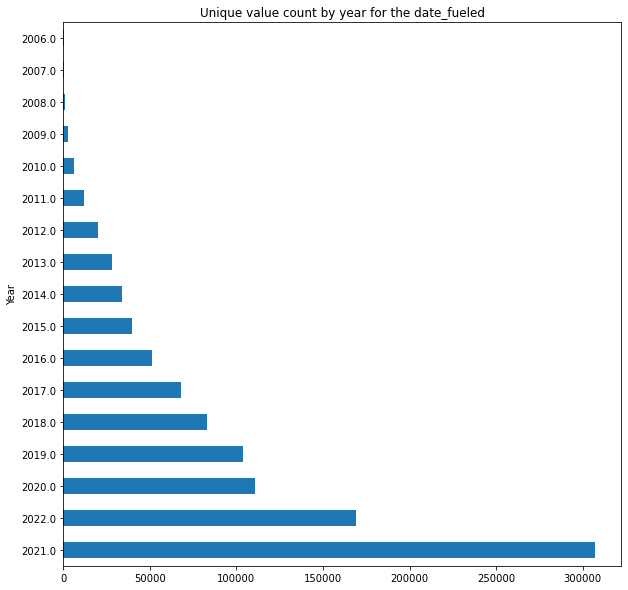

In [10]:
print("The unique value count by year for the date_fueled column is given by:")
year = pd.DatetimeIndex(dataset['date_fueled']).year.value_counts()
year.plot.barh(figsize=(10,10) , title='Unique value count by year for the date_fueled', ylabel='Year')

The unique value count by month for the date_fueled column is given by:


<AxesSubplot:title={'center':'Unique value count by month'}, ylabel='Month'>

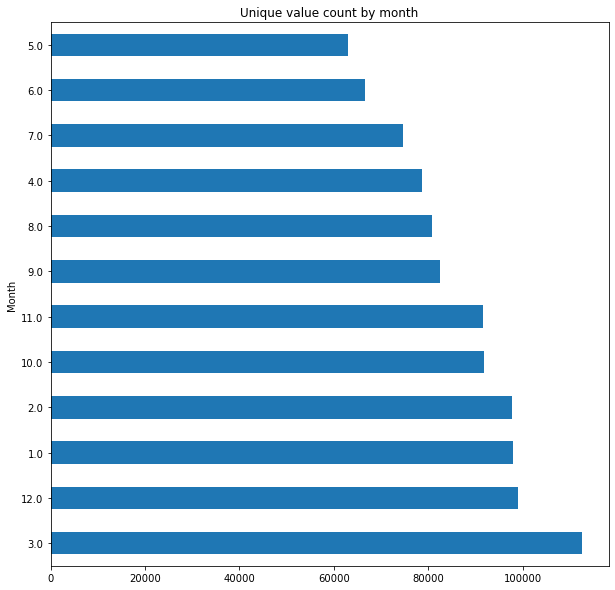

In [11]:
print("The unique value count by month for the date_fueled column is given by:")
year = pd.DatetimeIndex(dataset['date_fueled']).month.value_counts()
year.plot.barh(figsize=(10,10), title='Unique value count by month', ylabel='Month')

The unique value count by day for the date_fueled column is given by:


<AxesSubplot:title={'center':'Unique value count by day'}, ylabel='Day'>

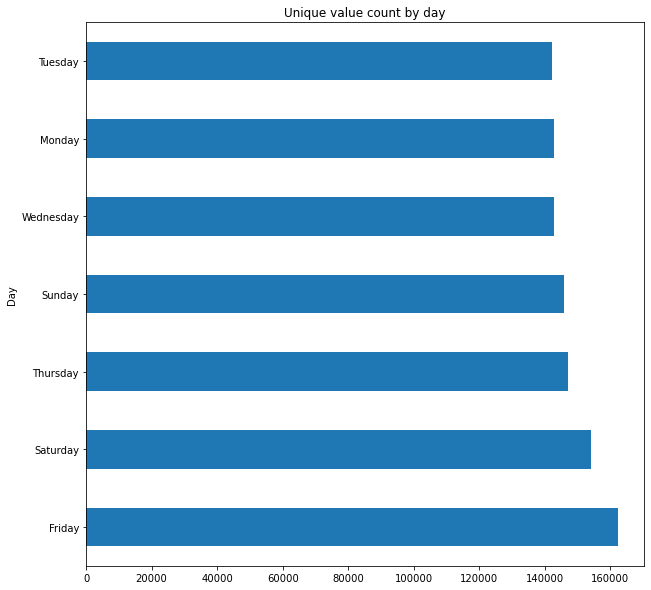

In [12]:
print("The unique value count by day for the date_fueled column is given by:")
days = dataset["date_fueled"].dt.day_name()
days.value_counts().plot.barh(figsize=(10,10),title='Unique value count by day',ylabel='Day')

<h3>Conclusion</h3>

<p>After completing the necessary processing, we obtain the following information:/p>

<ul>
    <li>The invalid dates constitute 11.685765507961046% of the dataset</li>
    <li>Entries that were in the future or that are earlier than 2005 constitute  0.06085779703286321 % of the dataset</li>
    <li> As the years progress more users refuel their vehicles with 2021 being the year with the most users refueling their vehicles. This indicates as the years progress more individuals have been purchasing vehicles.</li>
    <li> The month of March(i.e 3.0) is the month in which most users were refueling their vehicles.</li>
    <li> Most users refueled their vehicles on a Friday and Saturday. This could be due to the fact that most individual travel from Friday and Saturday</li>
</ul>

<h2>2.Date_captured</h2>

In [13]:
dataset["date_captured"] = dataset["date_captured"].str.replace(" ","-")
dataset["date_captured"] = dataset["date_captured"].str.replace("Jan","01")
dataset["date_captured"] = dataset["date_captured"].str.replace("Feb","02")
dataset["date_captured"] = dataset["date_captured"].str.replace("Mar","03")
dataset["date_captured"] = dataset["date_captured"].str.replace("Apr","04")
dataset["date_captured"] = dataset["date_captured"].str.replace("May","05")
dataset["date_captured"] = dataset["date_captured"].str.replace("Jun","06")
dataset["date_captured"] = dataset["date_captured"].str.replace("Jul","07")
dataset["date_captured"] = dataset["date_captured"].str.replace("Aug","08")
dataset["date_captured"] = dataset["date_captured"].str.replace("Sep","09")
dataset["date_captured"] = dataset["date_captured"].str.replace("Oct","10")
dataset["date_captured"] = dataset["date_captured"].str.replace("Nov","11")
dataset["date_captured"] = dataset["date_captured"].str.replace("Dec","12")
dataset["date_captured"] = pd.to_datetime(dataset["date_captured"],format='%m-%d-%Y',errors='coerce')
dataset["date_captured"]


0         2022-04-07
1         2016-08-30
2         2012-09-28
3         2019-05-04
4         2022-02-15
             ...    
1174865   2020-02-19
1174866   2019-12-06
1174867   2021-10-04
1174868   2021-07-26
1174869   2019-03-12
Name: date_captured, Length: 1174157, dtype: datetime64[ns]

In [14]:
today = date.today()

print("The date_captured entries that were in the future or that are earlier than 2005:")


#Years below 2005
idx = np.where(pd.DatetimeIndex(dataset['date_captured']).year <= 2005)
display(dataset["date_captured"].iloc[idx])

#Future dates
idx2 = np.where(pd.DatetimeIndex(dataset['date_captured']).date >= today)
display(dataset["date_captured"].iloc[idx2])

print("Entries that were in the future or that are earlier than 2005 constitute ",((len(idx[0])+len(idx2[0]))/dataset.shape[0])*100,"% of the dataset")

dataset.drop(idx[0], axis=0, inplace=True)
dataset.drop(idx2[0], axis=0, inplace=True)

The date_captured entries that were in the future or that are earlier than 2005:


Series([], Name: date_captured, dtype: datetime64[ns])

Series([], Name: date_captured, dtype: datetime64[ns])

Entries that were in the future or that are earlier than 2005 constitute  0.0 % of the dataset


In [15]:
print("The unique value count for the date_captured column is given by:")
unique_values = dataset["date_captured"].isnull()
display(dataset["date_captured"].value_counts(dropna=False))
u_count = len(np.where(unique_values == True)[0])

print("\n")
print("The number of invalid dates = ",u_count)
print("The percentage of invalid dates = ",(u_count/dataset.shape[0])*100,"%")

The unique value count for the date_captured column is given by:


2016-08-31    4346
2017-03-06    3363
2016-09-01    3311
2022-04-09    2889
2022-04-10    2737
              ... 
2008-11-15       1
2009-08-13       1
2008-08-17       1
2008-10-18       1
2008-12-26       1
Name: date_captured, Length: 4999, dtype: int64



The number of invalid dates =  0
The percentage of invalid dates =  0.0 %


The unique value count by year for the date_captured column is given by:


<AxesSubplot:title={'center':'Unique value count by year for the date_captured'}, ylabel='Year'>

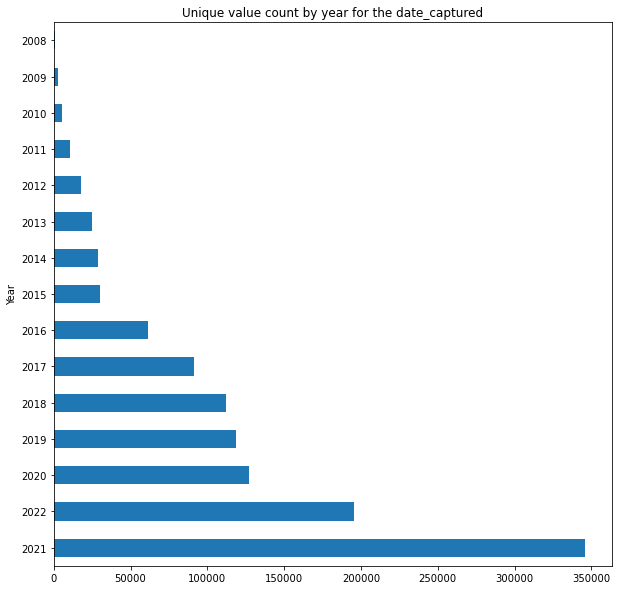

In [16]:
print("The unique value count by year for the date_captured column is given by:")
year = pd.DatetimeIndex(dataset['date_captured']).year.value_counts()
year.plot.barh(figsize=(10,10) , title='Unique value count by year for the date_captured', ylabel='Year')

The unique value count by month for the date_captured column is given by:


<AxesSubplot:title={'center':'Unique value count by month'}, ylabel='Month'>

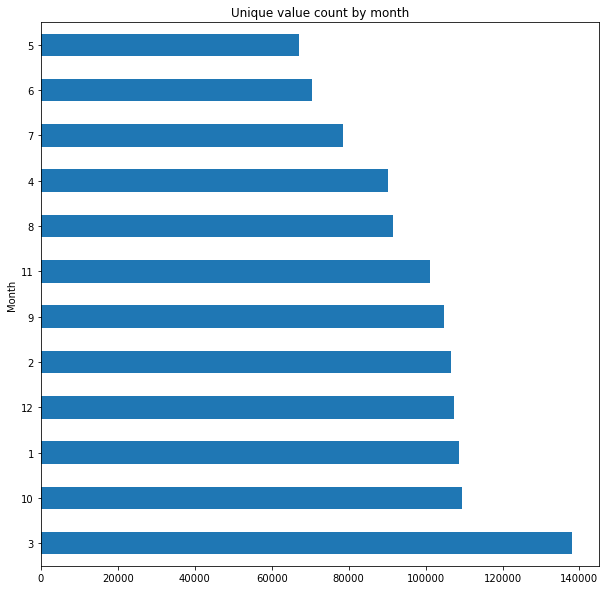

In [17]:
print("The unique value count by month for the date_captured column is given by:")
month = pd.DatetimeIndex(dataset['date_captured']).month.value_counts()
month.plot.barh(figsize=(10,10), title='Unique value count by month', ylabel='Month')

The unique value count by day for the date_captured column is given by:


<AxesSubplot:title={'center':'Unique value count by day'}, ylabel='Day'>

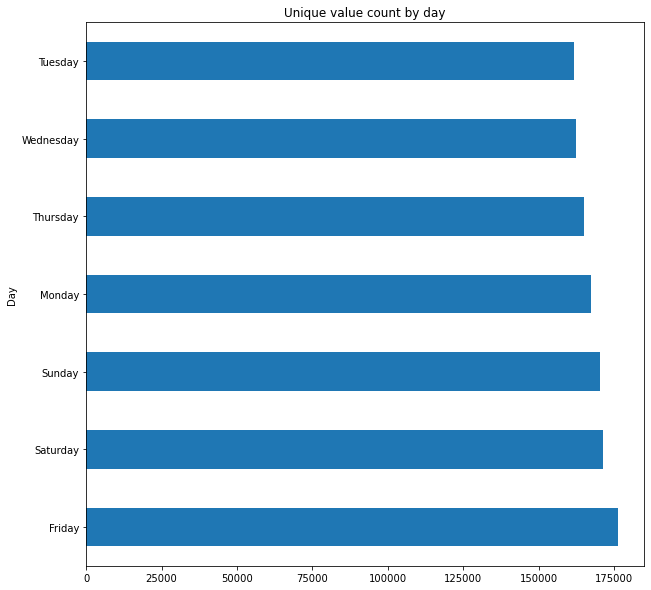

In [18]:
print("The unique value count by day for the date_captured column is given by:")
days = dataset["date_captured"].dt.day_name()
days.value_counts().plot.barh(figsize=(10,10),title='Unique value count by day',ylabel='Day')

<h3>Conclusion</h3>

<h2>3.Odometer</h2>

In [19]:
#Remove the delimiter
dataset["odometer"] = dataset["odometer"].str.replace(",","")
dataset["odometer"]

0           73370 
1           11983 
2           98233 
3          163802 
4              NaN
            ...   
1174865    118237 
1174866    141761 
1174867     65029 
1174868     15255 
1174869    204774 
Name: odometer, Length: 1174157, dtype: object

In [20]:
#Convert to appropriate dtype(i.e float64)
dataset["odometer"] = pd.to_numeric(dataset['odometer'],errors = 'coerce')
dataset["odometer"]

0           73370.0
1           11983.0
2           98233.0
3          163802.0
4               NaN
             ...   
1174865    118237.0
1174866    141761.0
1174867     65029.0
1174868     15255.0
1174869    204774.0
Name: odometer, Length: 1174157, dtype: float64

In [21]:
#Assess number of missing values
NaN_count = dataset["odometer"].isna().sum()
print("The odometer column consist of ",NaN_count," missing values which constitute ",(NaN_count/dataset['odometer'].shape[0])*100,"% of the odometer column")

The odometer column consist of  149004  missing values which constitute  12.690296101798992 % of the odometer column


In [22]:
#Provide Statistical Summary of odometer column
display(dataset["odometer"].describe())

count    1.025153e+06
mean     1.040019e+05
std      3.406154e+05
min      0.000000e+00
25%      4.592400e+04
50%      9.188700e+04
75%      1.469260e+05
max      2.543621e+08
Name: odometer, dtype: float64

<h2>4.Gallons</h2>

In [23]:
#Remove the delimiter
dataset["gallons"] = dataset["gallons"].str.replace(",","")
dataset["gallons"]

0             NaN
1          12.120
2           7.991
3          10.575
4          11.651
            ...  
1174865    13.046
1174866    12.637
1174867    10.002
1174868    10.493
1174869    17.350
Name: gallons, Length: 1174157, dtype: object

In [24]:
#Convert to appropriate dtype(i.e float64)
dataset["gallons"] = pd.to_numeric(dataset['gallons'],errors = 'coerce')
dataset["gallons"]

0             NaN
1          12.120
2           7.991
3          10.575
4          11.651
            ...  
1174865    13.046
1174866    12.637
1174867    10.002
1174868    10.493
1174869    17.350
Name: gallons, Length: 1174157, dtype: float64

In [25]:
#Provide Statistical Summary of odometer column
display(dataset["gallons"].describe())

count    1.038672e+06
mean     1.282238e+01
std      7.663733e+01
min      0.000000e+00
25%      8.991000e+00
50%      1.195400e+01
75%      1.493900e+01
max      2.838000e+04
Name: gallons, dtype: float64

<h2>5.Mile per gallon</h2>

In [26]:
#Remove the delimiter
dataset["mpg"] = dataset["mpg"].str.replace(",","")
dataset["mpg"]

0           NaN
1          31.6
2          28.5
3          46.8
4          21.0
           ... 
1174865     NaN
1174866     NaN
1174867     NaN
1174868     NaN
1174869     NaN
Name: mpg, Length: 1174157, dtype: object

In [27]:
#Convert to appropriate dtype(i.e float64)
dataset["mpg"] = pd.to_numeric(dataset['mpg'],errors = 'coerce')
dataset["mpg"]

0           NaN
1          31.6
2          28.5
3          46.8
4          21.0
           ... 
1174865     NaN
1174866     NaN
1174867     NaN
1174868     NaN
1174869     NaN
Name: mpg, Length: 1174157, dtype: float64

<h2>6.Miles</h2>

In [28]:
#Remove the delimiter
dataset["miles"] = dataset["miles"].str.replace(",","")
dataset["miles"]

0              NaN
1              NaN
2              NaN
3              NaN
4           244.4 
            ...   
1174865        NaN
1174866        NaN
1174867        NaN
1174868        NaN
1174869        NaN
Name: miles, Length: 1174157, dtype: object

In [29]:
#Convert to appropriate dtype(i.e float64)
dataset["miles"] = pd.to_numeric(dataset['miles'],errors = 'coerce')
dataset["miles"]

0            NaN
1            NaN
2            NaN
3            NaN
4          244.4
           ...  
1174865      NaN
1174866      NaN
1174867      NaN
1174868      NaN
1174869      NaN
Name: miles, Length: 1174157, dtype: float64

<h3>Before Adding Constructable Values</h3>

In [30]:
#Assess number of missing values
NaN_count = dataset["gallons"].isna().sum()
print("The gallons column consist of ",NaN_count," missing values which constitute ",(NaN_count/dataset['gallons'].shape[0])*100,"% of the gallons column")
#Assess number of missing values
NaN_count = dataset["mpg"].isna().sum()
print("The mpg column consist of ",NaN_count," missing values which constitute ",(NaN_count/dataset['mpg'].shape[0])*100,"% of the mpg column")
#Assess number of missing values
NaN_count = dataset["miles"].isna().sum()
print("The miles column consist of ",NaN_count," missing values which constitute ",(NaN_count/dataset['miles'].shape[0])*100,"% of the miles column")

The gallons column consist of  135485  missing values which constitute  11.538916856945026 % of the gallons column
The mpg column consist of  990164  missing values which constitute  84.3297787263543 % of the mpg column
The miles column consist of  1028032  missing values which constitute  87.55490109073999 % of the miles column


<h4>Plots</h4>

<AxesSubplot:>

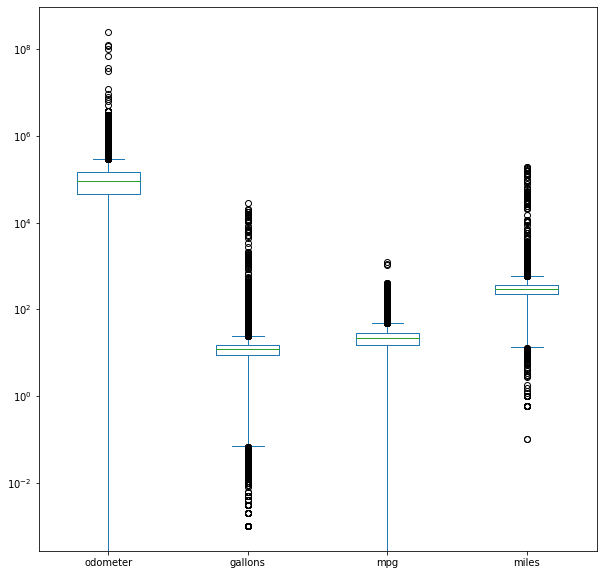

In [31]:
#Boxplots
dataset.plot.box(logy=True,figsize=(10,10))

<AxesSubplot:title={'center':'Histogram for odometer'}, ylabel='Frequency'>

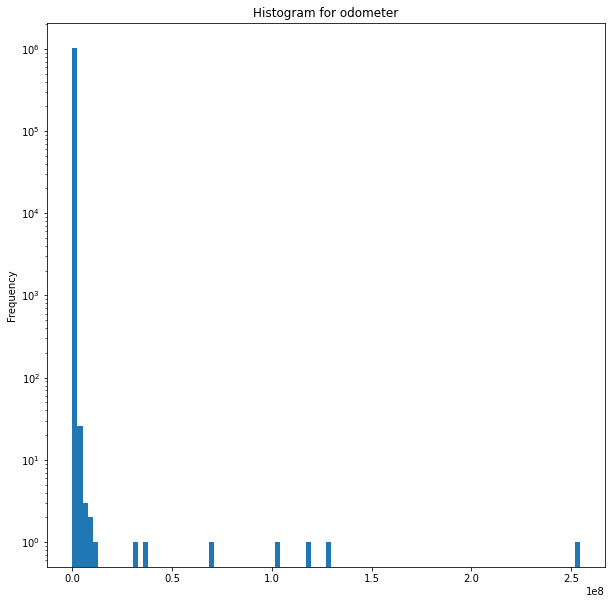

In [32]:
#Assess Distribution
dataset["odometer"].plot.hist(logy=True,figsize=(10,10), title='Histogram for odometer',bins=100)


<AxesSubplot:title={'center':'Histogram for gallons'}, ylabel='Frequency'>

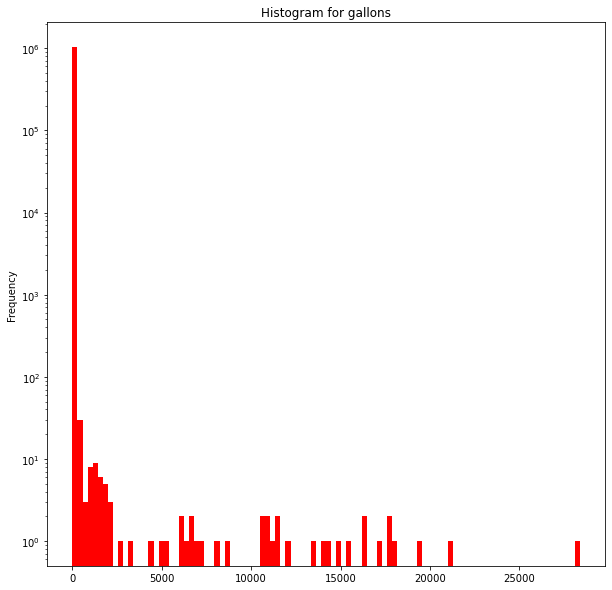

In [33]:
dataset["gallons"].plot.hist(logy=True,figsize=(10,10), title='Histogram for gallons',bins=100,color='red')

<AxesSubplot:title={'center':'Histogram for mpg'}, ylabel='Frequency'>

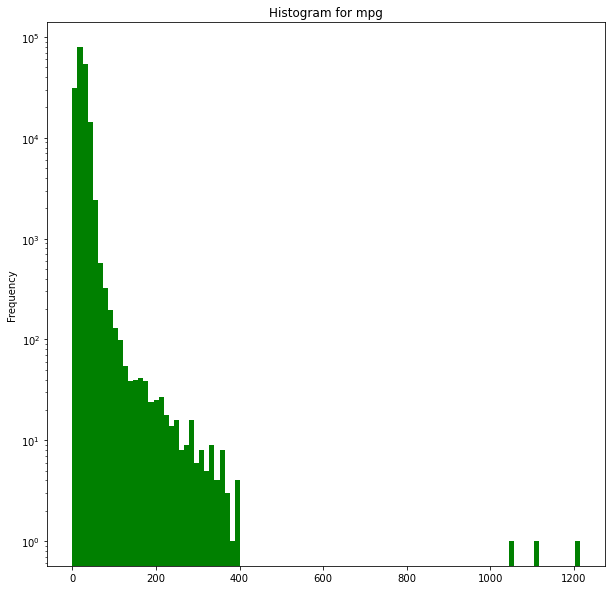

In [34]:
dataset["mpg"].plot.hist(logy=True,figsize=(10,10), title='Histogram for mpg',bins=100,color='green')

<AxesSubplot:title={'center':'Histogram for miles'}, ylabel='Frequency'>

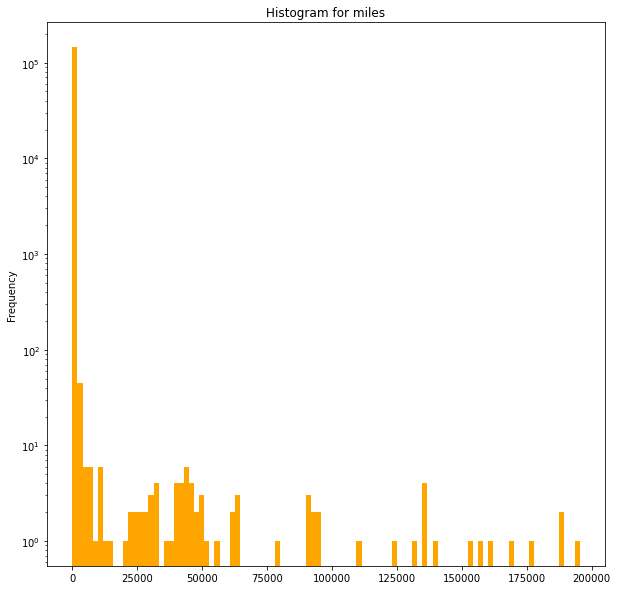

In [35]:
dataset["miles"].plot.hist(logy=True,figsize=(10,10), title='Histogram for miles',bins=100,color='orange')

<h4>Statistical description</h4>

In [36]:
dataset[["miles",'gallons','mpg']].describe()

print("The kurtosis of respective columns are as follows:\n")
display(dataset[["miles",'gallons','mpg']].kurtosis())

print("The skewness of respective columns are as follows:\n")
dataset[["miles",'gallons','mpg']].skew()

The kurtosis of respective columns are as follows:



miles       5464.623120
gallons    52817.061986
mpg          416.448187
dtype: float64

The skewness of respective columns are as follows:



miles       69.144093
gallons    214.821718
mpg          9.760422
dtype: float64

<h3>Adding Constructable Values</h3>

In [37]:
#Construct miles from gallons and mpg
missing_idx = np.where((dataset["miles"].isna() == True)&(dataset["gallons"].isna() == False) & (dataset["mpg"].isna() == False))
display(dataset[['miles','gallons','mpg']].iloc[missing_idx])
dataset["miles"].iloc[missing_idx] = dataset["mpg"].iloc[missing_idx] * dataset["gallons"].iloc[missing_idx]
display(dataset[['miles','gallons','mpg']].iloc[missing_idx])

,miles,gallons,mpg
1,NaN,12.120,31.6
2,NaN,7.991,28.5
3,NaN,10.575,46.8
5,NaN,3.413,29.0
6,NaN,9.044,29.5
...,...,...,...
983033,NaN,12.593,33.3
983035,NaN,11.208,0.0
983036,NaN,13.118,0.0
983038,NaN,13.079,41.2


/home/william/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,miles,gallons,mpg
1,382.9920,12.120,31.6
2,227.7435,7.991,28.5
3,494.9100,10.575,46.8
5,98.9770,3.413,29.0
6,266.7980,9.044,29.5
...,...,...,...
983033,419.3469,12.593,33.3
983035,0.0000,11.208,0.0
983036,0.0000,13.118,0.0
983038,538.8548,13.079,41.2


In [38]:
#Construct gallons from miles and mpg
missing_idx = np.where((dataset["gallons"].isna() == True)&(dataset["miles"].isna() == False) & (dataset["mpg"].isna() == False))
display(dataset[['gallons','miles','mpg']].iloc[missing_idx])
dataset["gallons"].iloc[missing_idx] = dataset["miles"].iloc[missing_idx] / dataset["mpg"].iloc[missing_idx]
display(dataset[['gallons','miles','mpg']].iloc[missing_idx])

,gallons,miles,mpg


/home/william/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,gallons,miles,mpg


In [39]:
#Construct mpg from miles and gallons
missing_idx = np.where((dataset["mpg"].isna() == True)&(dataset["gallons"].isna() == False)&(dataset["miles"].isna() == False)&(dataset["gallons"] != 0))
display(dataset[['mpg','miles','gallons']].iloc[missing_idx])
dataset["mpg"].iloc[missing_idx] = dataset["miles"].iloc[missing_idx] / dataset["gallons"].iloc[missing_idx]
display(dataset[['mpg','miles','gallons']].iloc[missing_idx])

,mpg,miles,gallons
65536,NaN,219.6,9.095
65538,NaN,297.8,19.166
65552,NaN,397.9,15.107
65568,NaN,586.0,19.797
65573,NaN,212.2,9.395
...,...,...,...
1174836,NaN,491.0,23.825
1174839,NaN,364.9,26.712
1174840,NaN,127.0,6.459
1174851,NaN,262.0,14.857


/home/william/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,mpg,miles,gallons
65536,24.145135,219.6,9.095
65538,15.537932,297.8,19.166
65552,26.338783,397.9,15.107
65568,29.600445,586.0,19.797
65573,22.586482,212.2,9.395
...,...,...,...
1174836,20.608604,491.0,23.825
1174839,13.660527,364.9,26.712
1174840,19.662486,127.0,6.459
1174851,17.634785,262.0,14.857


<h3>After Adding Constructable Values</h3>

In [40]:
NaN_count = dataset["miles"].isna().sum()
print("The miles column consist of ",NaN_count," missing values which constitute ",(NaN_count/dataset['miles'].shape[0])*100,"% of the miles column")

NaN_count = dataset["mpg"].isna().sum()
print("The mpg column consist of ",NaN_count," missing values which constitute ",(NaN_count/dataset['mpg'].shape[0])*100,"% of the mpg column")

NaN_count = dataset["gallons"].isna().sum()
print("The gallons column consist of ",NaN_count," missing values which constitute ",(NaN_count/dataset['gallons'].shape[0])*100,"% of the gallons column")

The miles column consist of  868226  missing values which constitute  73.94462580387462 % of the miles column
The mpg column consist of  876526  missing values which constitute  74.65151593866919 % of the mpg column
The gallons column consist of  135485  missing values which constitute  11.538916856945026 % of the gallons column


<h4>Plots</h4>

<AxesSubplot:>

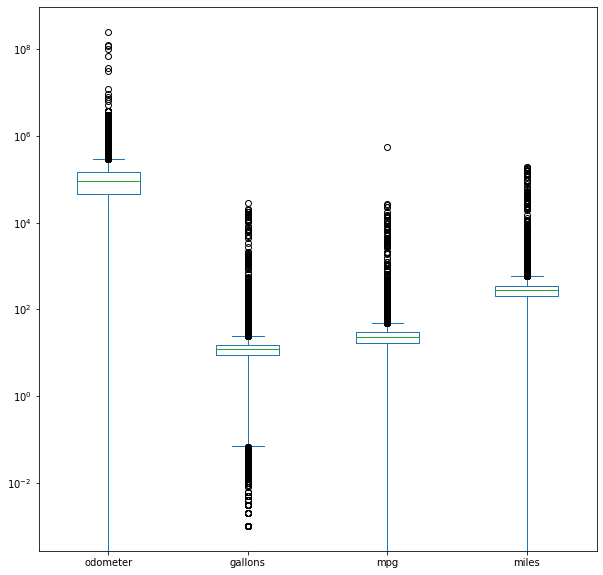

In [41]:
dataset.plot.box(logy=True,figsize=(10,10))

<AxesSubplot:title={'center':'Histogram for gallons'}, ylabel='Frequency'>

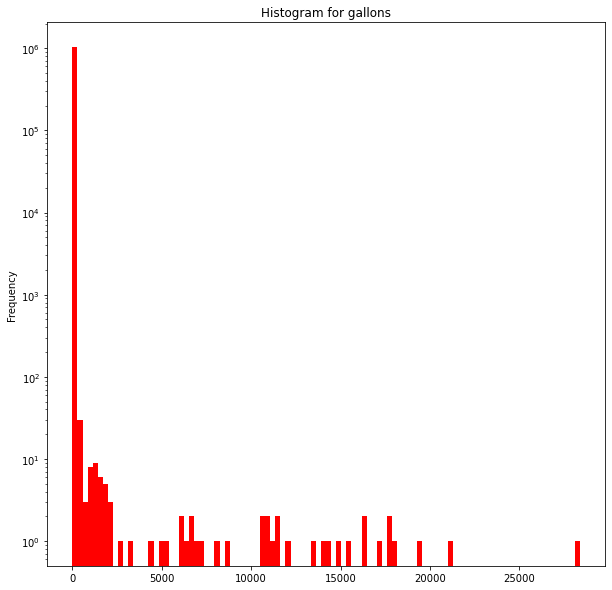

In [42]:
dataset["gallons"].plot.hist(logy=True,figsize=(10,10), title='Histogram for gallons',bins=100,color='red')

<AxesSubplot:title={'center':'Histogram for mpg'}, ylabel='Frequency'>

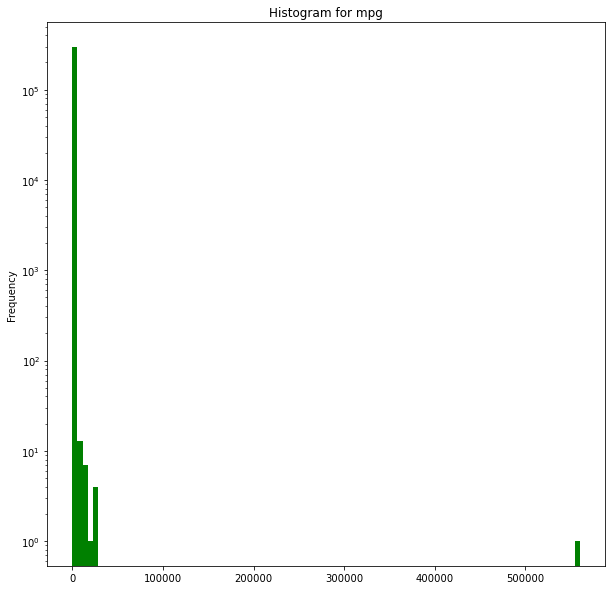

In [43]:
dataset['mpg'].plot.hist(logy=True,figsize=(10,10), title='Histogram for mpg', bins=100,color='green')

<AxesSubplot:title={'center':'Histogram for miles'}, ylabel='Frequency'>

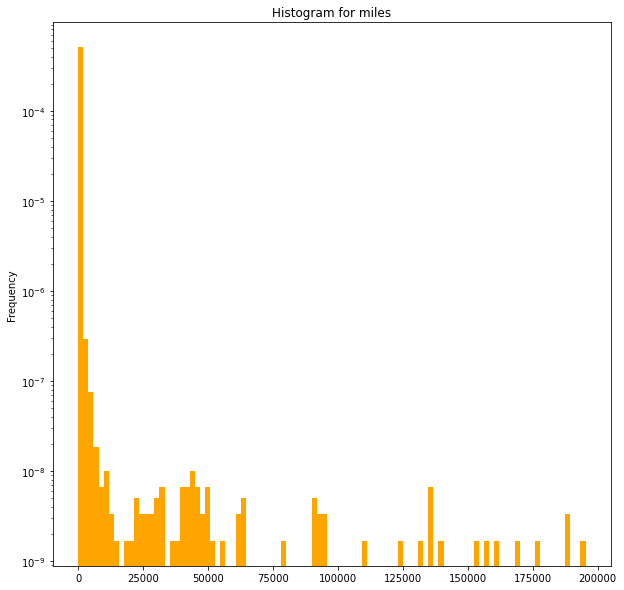

In [44]:
dataset["miles"].plot.hist(density=True,logy=True,figsize=(10,10), title='Histogram for miles',bins=100,color='orange')

<h4>Statistical description</h4>

In [45]:
display(dataset[["miles",'gallons','mpg']].describe())


print("The kurtosis of respective columns are as follows:\n")
display(dataset[["miles",'gallons','mpg']].kurtosis())

print("The skewness of respective columns are as follows:\n")
dataset[["miles",'gallons','mpg']].skew(axis=1)

print("The unique value count of respective columns are as follows:")
display(dataset[["miles"]].value_counts())
display(dataset[["gallons"]].value_counts())
display(dataset[["mpg"]].value_counts())



,miles,gallons,mpg
count,305931.000000,1.038672e+06,297631.000000
mean,298.946391,1.282238e+01,27.283293
std,1336.446779,7.663733e+01,1034.921293
min,0.000000,0.000000e+00,0.000000
25%,201.863800,8.991000e+00,17.236624
50%,277.322100,1.195400e+01,23.000000
75%,352.452150,1.493900e+01,29.801146
max,195321.200000,2.838000e+04,559860.946746


The kurtosis of respective columns are as follows:



miles       11039.728708
gallons     52817.061986
mpg        287701.933209
dtype: float64

The skewness of respective columns are as follows:

The unique value count of respective columns are as follows:


miles      
0.0000         22567
300.0000         293
320.0000         270
280.0000         223
292.0000         222
               ...  
245.1780           1
245.1780           1
245.1750           1
245.1744           1
195321.2000        1
Length: 134966, dtype: int64

gallons  
10.567       1846
13.209       1774
5.283        1744
7.925        1694
15.850       1063
             ... 
32.367          1
32.364          1
32.363          1
32.361          1
28380.000       1
Length: 36321, dtype: int64

mpg          
0.000000         23283
20.600000          866
21.200000          861
21.100000          850
22.200000          850
                 ...  
21.361284            1
21.361214            1
21.361193            1
21.361191            1
559860.946746        1
Length: 112621, dtype: int64

<h3>Conclusion</h3>

<p>From the above statistical description we see that for the miles, gallons and mpg columns we have:</p>

<ul>
    <li>The standard deviation is greater than the mean, this may indicate that there is a significant spread between data points and indicates that the chances of a randomly selected element from the dataset being close to the mean value is very low.</li>
    <li>The kurtosis of the miles column is Leptokurtic(i.e kurtosis > 0), which indicates to us that the distribution is heavy-tailed which signifies the presence of outlier within the data</li>
    <li>The skewness of the miles column is positive which indicates asymmetry in the distribution corresponding to the tail being larger towards the right hand side of the distribution</li>
</ul>

<p>The results make sense because even though there is a significant amount of data, majority of the values for these columns are invalid entries(i.e NaN values) causing a greater spread between the correctly recorded values and hence each column had a standard deviation greater then the mean. Furthermore, when we assess the above histogram on the respective columns we find the distribution is skewed towards the right with a heavy tail indicating outliers. Lastly, the most frequent value in mpg is the value 0 which corresponds to the miles also having the most frequent value being the value 0.

<h1>Feature Engineering</h1>

In [46]:
dataset["currency"] = dataset["total_spent"].apply(currency)
display(dataset.head(30))

dataset["currency"].value_counts()

,date_fueled,date_captured,odometer,gallons,cost_per_gallon,total_spent,mpg,miles,user_url,currency
0,NaT,2022-04-07,73370.0,NaN,NaN,NaN,NaN,NaN,https://www.somewebsite.com/suzuki/swift/2015/...,None
1,2012-11-07,2016-08-30,11983.0,12.120,$5.599,$67.86,31.6,382.9920,https://www.somewebsite.com/bmw/x3/2009/461150,$
2,2012-09-22,2012-09-28,98233.0,7.991,£5.45,£43.53,28.5,227.7435,https://www.somewebsite.com/mercedes-benz/e300...,£
3,2019-05-04,2019-05-04,163802.0,10.575,£5.11,£54.00,46.8,494.9100,https://www.somewebsite.com/bmw/320d/2010/247233,£
4,2022-02-15,2022-02-15,NaN,11.651,$3.029,$35.29,21.0,244.4000,https://www.somewebsite.com/honda/passport/201...,$
5,2021-10-23,2021-10-23,147567.0,3.413,$3.739,$12.76,29.0,98.9770,https://www.somewebsite.com/volkswagen/passat/...,$
6,2021-11-20,2021-12-12,105929.0,9.044,$4.639,$41.96,29.5,266.7980,https://www.somewebsite.com/mazda/3_sport/2010...,$
7,2022-01-20,2022-01-20,59475.0,14.962,$2.929,$43.82,27.3,408.4626,https://www.somewebsite.com/subaru/forester/20...,$
8,NaT,2018-04-16,137562.0,NaN,NaN,NaN,NaN,NaN,https://www.somewebsite.com/kianival/2009/789684,None
9,NaT,2020-11-29,99296.0,2.710,$1.999,$5.42,0.0,0.0000,https://www.somewebsite.com/lexus/rx350/2012/8...,$


$      741872
£       87568
€       59261
CA$     46846
R       36415
        ...  
TMT        11
CV$        11
KGS         9
L$          9
IQD         8
Name: currency, Length: 121, dtype: int64

<h2>7.Total spent</h2>

In [47]:
dataset["total_spent_float"]=dataset["total_spent"].apply(float_val)
dataset

,date_fueled,date_captured,odometer,gallons,cost_per_gallon,total_spent,mpg,miles,user_url,currency,total_spent_float
0,NaT,2022-04-07,73370.0,NaN,NaN,NaN,NaN,NaN,https://www.somewebsite.com/suzuki/swift/2015/...,None,NaN
1,2012-11-07,2016-08-30,11983.0,12.120,$5.599,$67.86,31.6,382.9920,https://www.somewebsite.com/bmw/x3/2009/461150,$,67.86
2,2012-09-22,2012-09-28,98233.0,7.991,£5.45,£43.53,28.5,227.7435,https://www.somewebsite.com/mercedes-benz/e300...,£,43.53
3,2019-05-04,2019-05-04,163802.0,10.575,£5.11,£54.00,46.8,494.9100,https://www.somewebsite.com/bmw/320d/2010/247233,£,54.00
4,2022-02-15,2022-02-15,NaN,11.651,$3.029,$35.29,21.0,244.4000,https://www.somewebsite.com/honda/passport/201...,$,35.29
...,...,...,...,...,...,...,...,...,...,...,...
1174865,2020-02-19,2020-02-19,118237.0,13.046,$1.999,$26.08,NaN,NaN,https://www.somewebsite.com/volkswagen/beetle/...,$,26.08
1174866,2019-12-06,2019-12-06,141761.0,12.637,$2.449,$30.95,NaN,NaN,https://www.somewebsite.com/toyota/avalon/2000...,$,30.95
1174867,2021-10-04,2021-10-04,65029.0,10.002,$3.449,$34.50,NaN,NaN,https://www.somewebsite.com/fiat/500/2013/909694,$,34.50
1174868,2021-07-26,2021-07-26,15255.0,10.493,$3.539,$37.13,NaN,NaN,https://www.somewebsite.com/mini/cooper/2019/9...,$,37.13


<h2>8.Cost per gallon</h2>

In [48]:
dataset["cpg_float"]=dataset["cost_per_gallon"].apply(float_val)
dataset

,date_fueled,date_captured,odometer,gallons,cost_per_gallon,total_spent,mpg,miles,user_url,currency,total_spent_float,cpg_float
0,NaT,2022-04-07,73370.0,NaN,NaN,NaN,NaN,NaN,https://www.somewebsite.com/suzuki/swift/2015/...,None,NaN,NaN
1,2012-11-07,2016-08-30,11983.0,12.120,$5.599,$67.86,31.6,382.9920,https://www.somewebsite.com/bmw/x3/2009/461150,$,67.86,5.599
2,2012-09-22,2012-09-28,98233.0,7.991,£5.45,£43.53,28.5,227.7435,https://www.somewebsite.com/mercedes-benz/e300...,£,43.53,5.450
3,2019-05-04,2019-05-04,163802.0,10.575,£5.11,£54.00,46.8,494.9100,https://www.somewebsite.com/bmw/320d/2010/247233,£,54.00,5.110
4,2022-02-15,2022-02-15,NaN,11.651,$3.029,$35.29,21.0,244.4000,https://www.somewebsite.com/honda/passport/201...,$,35.29,3.029
...,...,...,...,...,...,...,...,...,...,...,...,...
1174865,2020-02-19,2020-02-19,118237.0,13.046,$1.999,$26.08,NaN,NaN,https://www.somewebsite.com/volkswagen/beetle/...,$,26.08,1.999
1174866,2019-12-06,2019-12-06,141761.0,12.637,$2.449,$30.95,NaN,NaN,https://www.somewebsite.com/toyota/avalon/2000...,$,30.95,2.449
1174867,2021-10-04,2021-10-04,65029.0,10.002,$3.449,$34.50,NaN,NaN,https://www.somewebsite.com/fiat/500/2013/909694,$,34.50,3.449
1174868,2021-07-26,2021-07-26,15255.0,10.493,$3.539,$37.13,NaN,NaN,https://www.somewebsite.com/mini/cooper/2019/9...,$,37.13,3.539


<h2>Car Information Extraction</h2>

In [49]:
dataset["car_make"]=dataset["user_url"].apply(car)
dataset.head(10)

,date_fueled,date_captured,odometer,gallons,cost_per_gallon,total_spent,mpg,miles,user_url,currency,total_spent_float,cpg_float,car_make
0,NaT,2022-04-07,73370.0,NaN,NaN,NaN,NaN,NaN,https://www.somewebsite.com/suzuki/swift/2015/...,None,NaN,NaN,suzuki
1,2012-11-07,2016-08-30,11983.0,12.120,$5.599,$67.86,31.6,382.9920,https://www.somewebsite.com/bmw/x3/2009/461150,$,67.86,5.599,bmw
2,2012-09-22,2012-09-28,98233.0,7.991,£5.45,£43.53,28.5,227.7435,https://www.somewebsite.com/mercedes-benz/e300...,£,43.53,5.450,mercedes-benz
3,2019-05-04,2019-05-04,163802.0,10.575,£5.11,£54.00,46.8,494.9100,https://www.somewebsite.com/bmw/320d/2010/247233,£,54.00,5.110,bmw
4,2022-02-15,2022-02-15,NaN,11.651,$3.029,$35.29,21.0,244.4000,https://www.somewebsite.com/honda/passport/201...,$,35.29,3.029,honda
5,2021-10-23,2021-10-23,147567.0,3.413,$3.739,$12.76,29.0,98.9770,https://www.somewebsite.com/volkswagen/passat/...,$,12.76,3.739,volkswagen
6,2021-11-20,2021-12-12,105929.0,9.044,$4.639,$41.96,29.5,266.7980,https://www.somewebsite.com/mazda/3_sport/2010...,$,41.96,4.639,mazda
7,2022-01-20,2022-01-20,59475.0,14.962,$2.929,$43.82,27.3,408.4626,https://www.somewebsite.com/subaru/forester/20...,$,43.82,2.929,subaru
8,NaT,2018-04-16,137562.0,NaN,NaN,NaN,NaN,NaN,https://www.somewebsite.com/kianival/2009/789684,None,NaN,NaN,kianival
9,NaT,2020-11-29,99296.0,2.710,$1.999,$5.42,0.0,0.0000,https://www.somewebsite.com/lexus/rx350/2012/8...,$,5.42,1.999,lexus


In [50]:
dataset["model"] = dataset["user_url"].apply(model)
dataset.head(10)

,date_fueled,date_captured,odometer,gallons,cost_per_gallon,total_spent,mpg,miles,user_url,currency,total_spent_float,cpg_float,car_make,model
0,NaT,2022-04-07,73370.0,NaN,NaN,NaN,NaN,NaN,https://www.somewebsite.com/suzuki/swift/2015/...,None,NaN,NaN,suzuki,swift
1,2012-11-07,2016-08-30,11983.0,12.120,$5.599,$67.86,31.6,382.9920,https://www.somewebsite.com/bmw/x3/2009/461150,$,67.86,5.599,bmw,x3
2,2012-09-22,2012-09-28,98233.0,7.991,£5.45,£43.53,28.5,227.7435,https://www.somewebsite.com/mercedes-benz/e300...,£,43.53,5.450,mercedes-benz,e300
3,2019-05-04,2019-05-04,163802.0,10.575,£5.11,£54.00,46.8,494.9100,https://www.somewebsite.com/bmw/320d/2010/247233,£,54.00,5.110,bmw,320d
4,2022-02-15,2022-02-15,NaN,11.651,$3.029,$35.29,21.0,244.4000,https://www.somewebsite.com/honda/passport/201...,$,35.29,3.029,honda,passport
5,2021-10-23,2021-10-23,147567.0,3.413,$3.739,$12.76,29.0,98.9770,https://www.somewebsite.com/volkswagen/passat/...,$,12.76,3.739,volkswagen,passat
6,2021-11-20,2021-12-12,105929.0,9.044,$4.639,$41.96,29.5,266.7980,https://www.somewebsite.com/mazda/3_sport/2010...,$,41.96,4.639,mazda,3_sport
7,2022-01-20,2022-01-20,59475.0,14.962,$2.929,$43.82,27.3,408.4626,https://www.somewebsite.com/subaru/forester/20...,$,43.82,2.929,subaru,forester
8,NaT,2018-04-16,137562.0,NaN,NaN,NaN,NaN,NaN,https://www.somewebsite.com/kianival/2009/789684,None,NaN,NaN,kianival,None
9,NaT,2020-11-29,99296.0,2.710,$1.999,$5.42,0.0,0.0000,https://www.somewebsite.com/lexus/rx350/2012/8...,$,5.42,1.999,lexus,rx350


In [51]:
def year(url):
    test = url
    lists = test[28:].split("/")

    year_regex = re.compile('[0-9]{4}')
    for i in range(len(lists)):
        if(len(str(lists[i])) == 4):
            if year_regex.match(lists[i]):
                return lists[i]
            
dataset["years"] = dataset["user_url"].apply(year)


In [52]:
dataset["UserID"] = dataset["user_url"].apply(userID)
dataset.head(10)

,date_fueled,date_captured,odometer,gallons,cost_per_gallon,total_spent,mpg,miles,user_url,currency,total_spent_float,cpg_float,car_make,model,years,UserID
0,NaT,2022-04-07,73370.0,NaN,NaN,NaN,NaN,NaN,https://www.somewebsite.com/suzuki/swift/2015/...,None,NaN,NaN,suzuki,swift,2015,674857
1,2012-11-07,2016-08-30,11983.0,12.120,$5.599,$67.86,31.6,382.9920,https://www.somewebsite.com/bmw/x3/2009/461150,$,67.86,5.599,bmw,x3,2009,461150
2,2012-09-22,2012-09-28,98233.0,7.991,£5.45,£43.53,28.5,227.7435,https://www.somewebsite.com/mercedes-benz/e300...,£,43.53,5.450,mercedes-benz,e300,1998,133501
3,2019-05-04,2019-05-04,163802.0,10.575,£5.11,£54.00,46.8,494.9100,https://www.somewebsite.com/bmw/320d/2010/247233,£,54.00,5.110,bmw,320d,2010,247233
4,2022-02-15,2022-02-15,NaN,11.651,$3.029,$35.29,21.0,244.4000,https://www.somewebsite.com/honda/passport/201...,$,35.29,3.029,honda,passport,2019,1038865
5,2021-10-23,2021-10-23,147567.0,3.413,$3.739,$12.76,29.0,98.9770,https://www.somewebsite.com/volkswagen/passat/...,$,12.76,3.739,volkswagen,passat,2004,445811
6,2021-11-20,2021-12-12,105929.0,9.044,$4.639,$41.96,29.5,266.7980,https://www.somewebsite.com/mazda/3_sport/2010...,$,41.96,4.639,mazda,3_sport,2010,529810
7,2022-01-20,2022-01-20,59475.0,14.962,$2.929,$43.82,27.3,408.4626,https://www.somewebsite.com/subaru/forester/20...,$,43.82,2.929,subaru,forester,2020,1087864
8,NaT,2018-04-16,137562.0,NaN,NaN,NaN,NaN,NaN,https://www.somewebsite.com/kianival/2009/789684,None,NaN,NaN,kianival,None,2009,789684
9,NaT,2020-11-29,99296.0,2.710,$1.999,$5.42,0.0,0.0000,https://www.somewebsite.com/lexus/rx350/2012/8...,$,5.42,1.999,lexus,rx350,2012,898688


<h2>Imperial units converse</h2>

In [53]:
dataset["liters_filled"] = dataset.apply(lambda x: (x["gallons"]*4.5460) if (x["currency"]=="£") else x["gallons"]*3.78541, axis=1)

In [54]:
dataset["km driven"] = dataset["miles"]*1.60934

In [55]:
dataset["ltrs/100km"] = dataset["liters_filled"]/(dataset["km driven"]/100)

In [56]:
dataset

,date_fueled,date_captured,odometer,gallons,cost_per_gallon,total_spent,mpg,miles,user_url,currency,total_spent_float,cpg_float,car_make,model,years,UserID,liters_filled,km driven,ltrs/100km
0,NaT,2022-04-07,73370.0,NaN,NaN,NaN,NaN,NaN,https://www.somewebsite.com/suzuki/swift/2015/...,None,NaN,NaN,suzuki,swift,2015,674857,NaN,NaN,NaN
1,2012-11-07,2016-08-30,11983.0,12.120,$5.599,$67.86,31.6,382.9920,https://www.somewebsite.com/bmw/x3/2009/461150,$,67.86,5.599,bmw,x3,2009,461150,45.879169,616.364345,7.443514
2,2012-09-22,2012-09-28,98233.0,7.991,£5.45,£43.53,28.5,227.7435,https://www.somewebsite.com/mercedes-benz/e300...,£,43.53,5.450,mercedes-benz,e300,1998,133501,36.327086,366.516724,9.911440
3,2019-05-04,2019-05-04,163802.0,10.575,£5.11,£54.00,46.8,494.9100,https://www.somewebsite.com/bmw/320d/2010/247233,£,54.00,5.110,bmw,320d,2010,247233,48.073950,796.478459,6.035813
4,2022-02-15,2022-02-15,NaN,11.651,$3.029,$35.29,21.0,244.4000,https://www.somewebsite.com/honda/passport/201...,$,35.29,3.029,honda,passport,2019,1038865,44.103812,393.322696,11.213137
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1174865,2020-02-19,2020-02-19,118237.0,13.046,$1.999,$26.08,NaN,NaN,https://www.somewebsite.com/volkswagen/beetle/...,$,26.08,1.999,volkswagen,beetle,2005,388391,49.384459,NaN,NaN
1174866,2019-12-06,2019-12-06,141761.0,12.637,$2.449,$30.95,NaN,NaN,https://www.somewebsite.com/toyota/avalon/2000...,$,30.95,2.449,toyota,avalon,2000,432408,47.836226,NaN,NaN
1174867,2021-10-04,2021-10-04,65029.0,10.002,$3.449,$34.50,NaN,NaN,https://www.somewebsite.com/fiat/500/2013/909694,$,34.50,3.449,fiat,500,2013,909694,37.861671,NaN,NaN
1174868,2021-07-26,2021-07-26,15255.0,10.493,$3.539,$37.13,NaN,NaN,https://www.somewebsite.com/mini/cooper/2019/9...,$,37.13,3.539,mini,cooper,2019,952426,39.720307,NaN,NaN


<h1>Vehicle Exploration</h1>

<h3>Number of unique users per country</h3>

In [57]:
currencies = dataset.groupby("currency").nunique()
display(currencies)
y=currencies["UserID"].values
x=currencies.index

,date_fueled,date_captured,odometer,gallons,cost_per_gallon,total_spent,mpg,miles,user_url,total_spent_float,cpg_float,car_make,model,years,UserID,liters_filled,km driven,ltrs/100km
currency,,,,,,,,,,,,,,,,,,
$,5298,4995,242592,34057,18582,42359,58926,97621,78721,42359,18582,33,1701,105,78721,34057,97356,72879
$U,456,382,532,422,131,456,69,76,57,456,131,16,41,27,57,422,76,74
AED,564,502,621,593,117,494,122,143,77,494,117,18,58,24,77,593,143,132
ALL,77,77,69,72,28,35,17,16,9,35,28,7,8,6,9,72,16,17
AMD,83,85,86,60,21,42,13,13,9,42,21,6,8,8,9,60,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
€,4485,4157,45509,11787,1163,10362,5935,10247,6757,10362,1163,31,857,65,6757,11787,10246,7861
₮,36,23,30,39,20,42,16,17,6,42,20,4,5,5,6,39,17,16
₱,1900,1539,3745,3200,2020,3169,458,711,480,3169,2020,18,139,36,480,3200,711,587


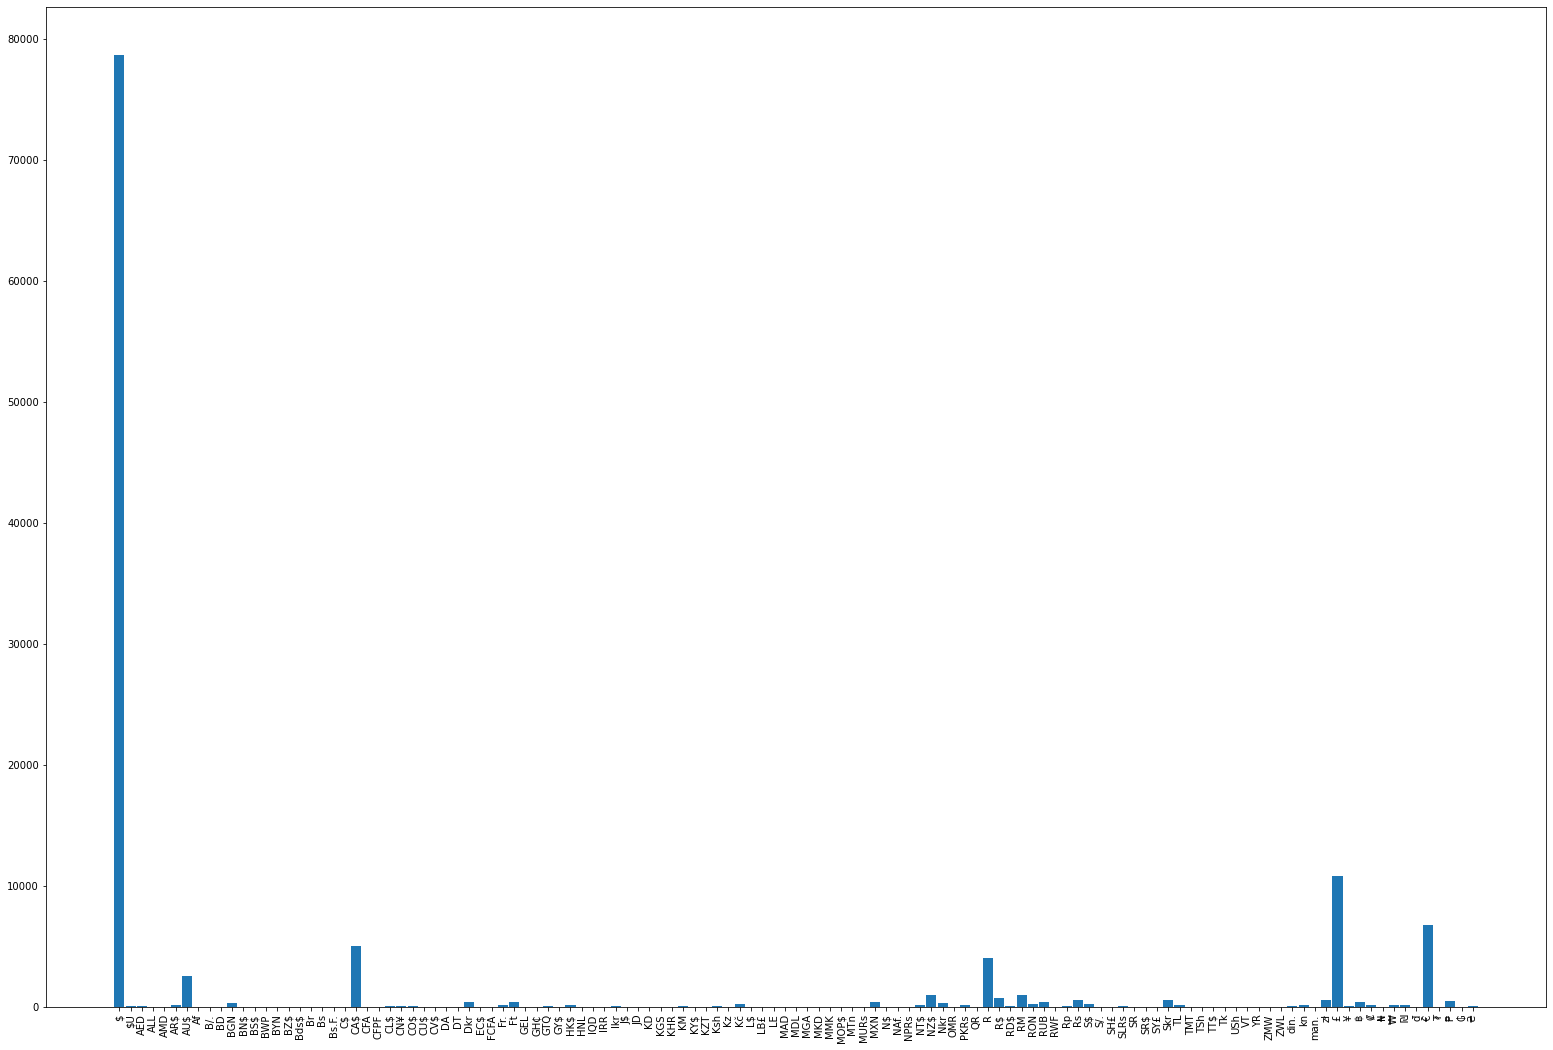

In [58]:
px = 1/plt.rcParams['figure.dpi']  # pixel in inches
fig = plt.figure(figsize=(1500*px, 1000*px))
ax = fig.add_axes([0,0,1,1])
langs = x
students = y
ax.bar(langs,students,width=0.9)
plt.xticks(rotation = 90)
plt.show()

<h3>Number of unique users per day</h3>

In [59]:
days = dataset.groupby("date_fueled").nunique()
display(days)
y = days["UserID"].values
x = days.index

,date_captured,odometer,gallons,cost_per_gallon,total_spent,mpg,miles,user_url,currency,total_spent_float,cpg_float,car_make,model,years,UserID,liters_filled,km driven,ltrs/100km
date_fueled,,,,,,,,,,,,,,,,,,
2006-01-08,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2006-01-13,3,3,3,3,3,2,2,3,1,3,3,3,3,3,3,3,2,2
2006-01-15,2,1,2,2,2,1,1,2,2,2,2,2,2,2,2,2,1,1
2006-01-16,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,0,0
2006-01-17,2,1,2,2,2,1,1,2,2,2,2,2,2,2,2,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-16,1,34,30,30,31,7,7,34,10,31,30,5,24,19,34,30,7,7
2022-04-19,2,1,1,1,1,1,1,2,1,1,1,2,2,2,2,1,1,1
2022-04-20,1,0,0,1,1,0,1,1,1,1,1,1,1,1,1,0,1,0


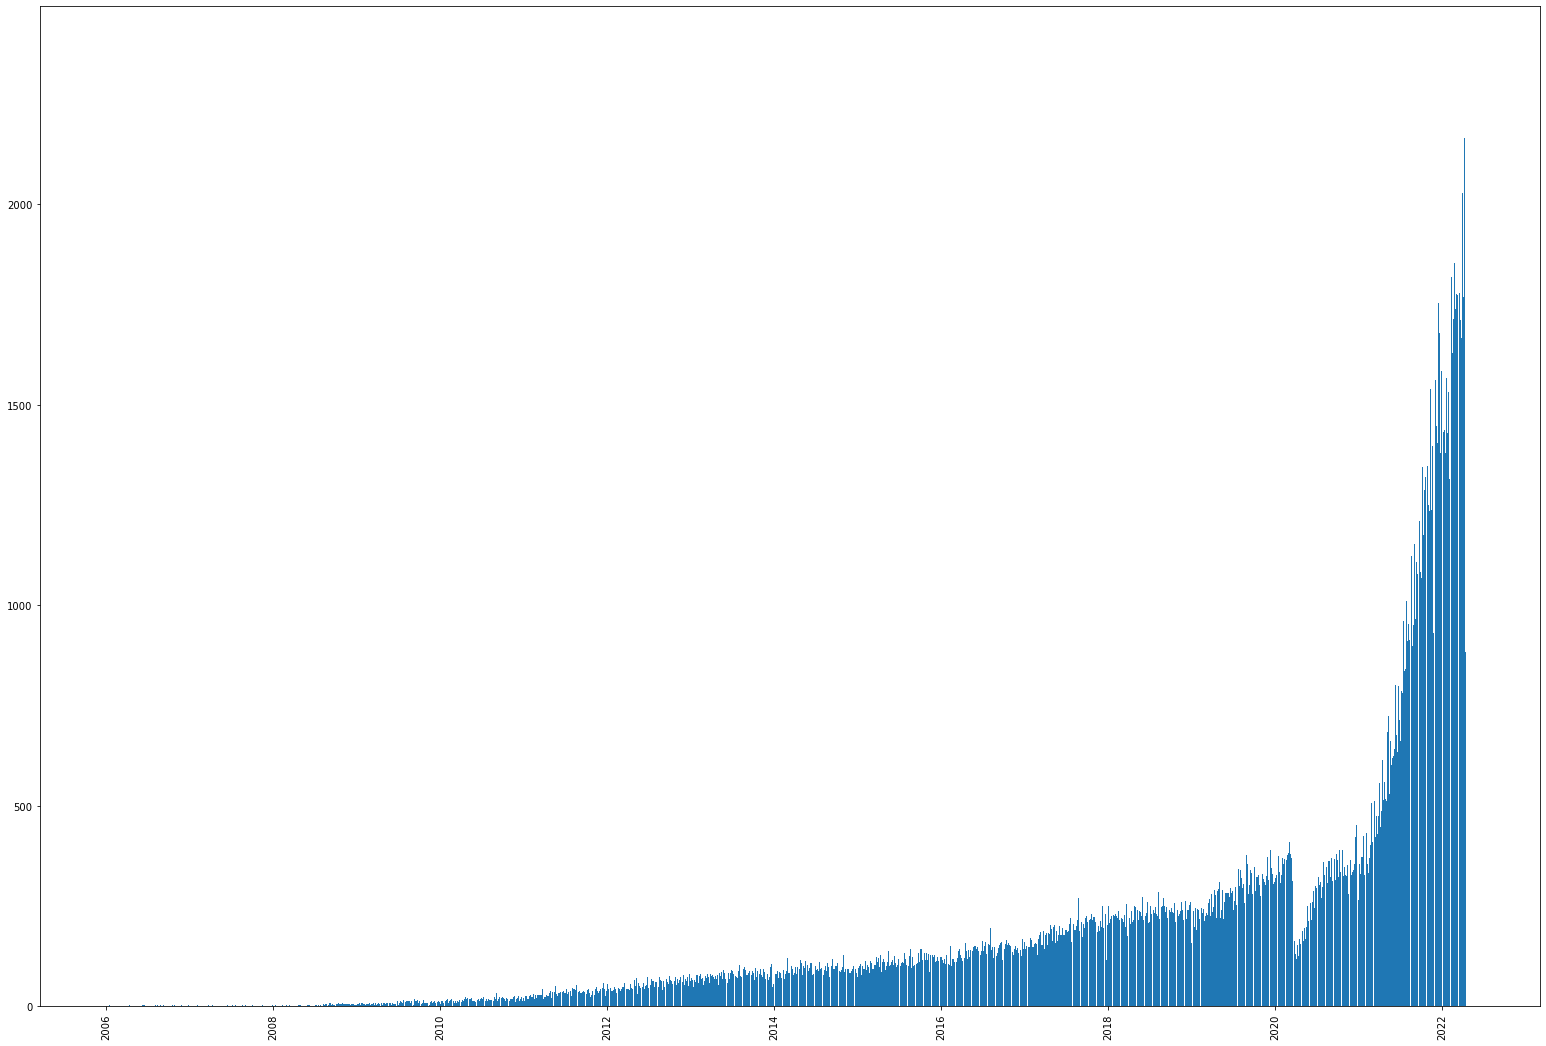

In [60]:
px = 1/plt.rcParams['figure.dpi']  # pixel in inches
fig = plt.figure(figsize=(1500*px, 1000*px))
ax = fig.add_axes([0,0,1,1])
x_axis = x
y_axis = y
ax.bar(x_axis,y_axis,width=0.9)
plt.xticks(rotation = 90)
plt.show()

<h3>Age of the vehicles per country</h3>

In [61]:
dataset["Age"] = pd.DatetimeIndex(dataset["date_fueled"]).year - pd.to_numeric(dataset["years"])

sub_df=dataset.groupby("currency").nunique()
display(sub_df)
y=sub_df["Age"].values
x=sub_df.index

,date_fueled,date_captured,odometer,gallons,cost_per_gallon,total_spent,mpg,miles,user_url,total_spent_float,cpg_float,car_make,model,years,UserID,liters_filled,km driven,ltrs/100km,Age
currency,,,,,,,,,,,,,,,,,,,
$,5298,4995,242592,34057,18582,42359,58926,97621,78721,42359,18582,33,1701,105,78721,34057,97356,72879,171
$U,456,382,532,422,131,456,69,76,57,456,131,16,41,27,57,422,76,74,37
AED,564,502,621,593,117,494,122,143,77,494,117,18,58,24,77,593,143,132,25
ALL,77,77,69,72,28,35,17,16,9,35,28,7,8,6,9,72,16,17,11
AMD,83,85,86,60,21,42,13,13,9,42,21,6,8,8,9,60,13,13,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
€,4485,4157,45509,11787,1163,10362,5935,10247,6757,10362,1163,31,857,65,6757,11787,10246,7861,99
₮,36,23,30,39,20,42,16,17,6,42,20,4,5,5,6,39,17,16,10
₱,1900,1539,3745,3200,2020,3169,458,711,480,3169,2020,18,139,36,480,3200,711,587,37


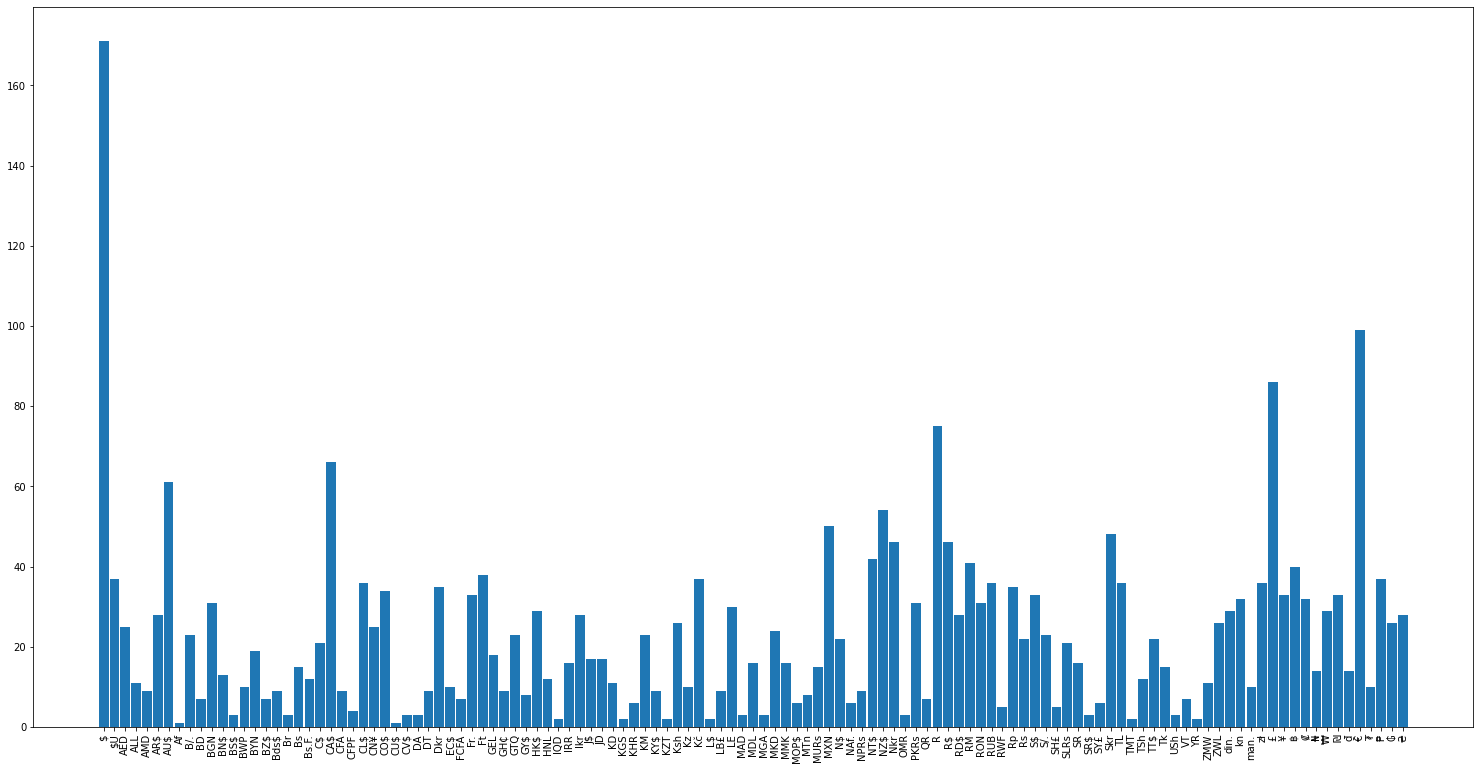

In [62]:
px = 1/plt.rcParams['figure.dpi']  # pixel in inches
fig = plt.figure(figsize=(20, 10))
ax = fig.add_axes([0,0,1,1])
langs = x
students = y
ax.bar(langs,students,width=0.9)
plt.xticks(rotation = 90)
plt.show()

<h3>Makes and models of vehicles</h3>

<p>We have arranged the data from most popular Make and model to least popular Make and model<p>

In [63]:
makes = dataset.groupby(["car_make","model"]).nunique()
makes.sort_values(by="UserID",ascending = False)

date_fueled  date_captured  \
car_make      model                                                      
ford          mustang                              2143           1819   
              f-150                                1670           1509   
toyota        land_cruiser                         2409           2114   
honda         civic                                1740           1617   
toyota        corolla                              1864           1685   
...                                                 ...            ...   
ford          special_service_police_sedan           12             12   
mercedes-benz gle63_amg_s                             4              4   
bmw           840i                                   10             10   
subaru        gsr                                     4              4   
mercedes-benz 220se                                   3              3   

                                            odometer  gallons  \
car_make      model                                             
ford          mustang                           6592     4638   
              f-150                             7158     5673   
toyota        land_cruiser                      6187     5242   
honda         civic                             6713     4589   
toyota        corolla                           6698     4389   
...                                              ...      ...   
ford          special_service_police_sedan        12       11   
mercedes-benz gle63_amg_s                          4        2   
bmw           840i                                11       10   
subaru        gsr                                  0        4   
mercedes-benz 220se                                3        3   

                                            cost_per_gallon  total_spent  \
car_make      model                                                        
ford          mustang                                  1117         3738   
              f-150                                     858         4369   
toyota        land_cruiser                             2242         5645   
honda         civic                                    1510         4127   
toyota        corolla                                  1748         4209   
...                                                     ...          ...   
ford          special_service_police_sedan                1            2   
mercedes-benz gle63_amg_s                                 4            4   
bmw           840i                                       10           10   
subaru        gsr                                         4            4   
mercedes-benz 220se                                       3            3   

                                             mpg  miles  user_url  currency  \
car_make      model                                                           
ford          mustang                        805   1494       815        11   
              f-150                          428   1316       781         6   
toyota        land_cruiser                   998   1738       751        34   
honda         civic                         1214   1884       743        30   
toyota        corolla                        939   1623       737        28   
...                                          ...    ...       ...       ...   
ford          special_service_police_sedan     3      3         1         1   
mercedes-benz gle63_amg_s                      0      0         1         1   
bmw           840i                             3      3         1         1   
subaru        gsr                              4      3         1         1   
mercedes-benz 220se                            2      2         1         1   

                                            total_spent_float  cpg_float  \
car_make      model                                                        
ford          mustang                                    3567     

<h3>Conclusion</h3>

<h1>Fuel Usage</h1>

<h2>Outlier Removal</h2>

<h3>Top 5 Currencies</h3>

<AxesSubplot:ylabel='UserID'>

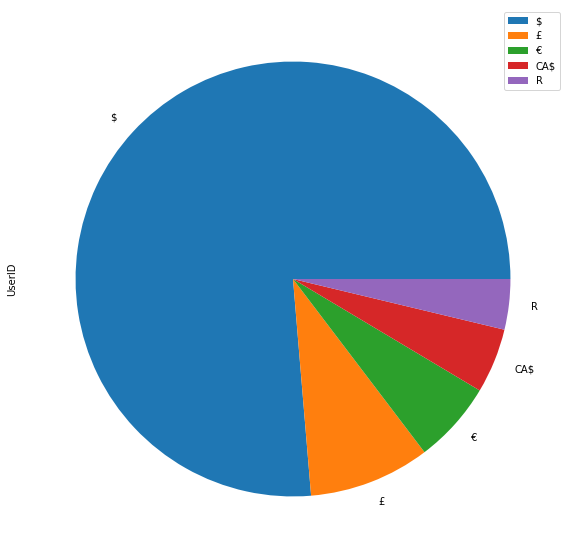

In [64]:
top_5_currencies = dataset.groupby("currency").count()
top_5_currencies = top_5_currencies.sort_values(by="UserID",ascending = False).iloc[:5]
    
top_5_currencies.plot.pie(y="UserID",figsize = (10,10))

In [65]:
top_5_currencies.head()

,date_fueled,date_captured,odometer,gallons,cost_per_gallon,total_spent,mpg,miles,user_url,total_spent_float,cpg_float,car_make,model,years,UserID,liters_filled,km driven,ltrs/100km,Age
currency,,,,,,,,,,,,,,,,,,,
$,686716,741872,665355,700612,739503,741872,183091,187324,741872,741872,739503,741872,739337,739535,741872,700612,187324,183012,684534
£,74179,87568,59150,82781,86372,87568,36609,38224,87568,87568,86372,87568,87251,87341,87568,82781,38224,36606,73969
€,53692,59261,52357,55925,58488,59261,15122,15539,59261,59261,58488,59261,58870,59043,59261,55925,15539,15118,53478
CA$,41396,46846,33598,44172,46349,46846,17952,18693,46846,46846,46349,46846,46709,46709,46846,44172,18693,17949,41264
R,31871,36415,31707,34361,36109,36415,9646,9904,36415,36415,36109,36415,36279,36293,36415,34361,9904,9646,31758


<h3>Removal of outlier</h3>

In [66]:
top_5_currencies_symbols = top_5_currencies.index

total_outliers = 0

In [67]:
dataset["cost_per_litre"] = dataset["cpg_float"]*(1/3.78541)

,date_fueled,date_captured,odometer,gallons,cost_per_gallon,total_spent,mpg,miles,user_url,currency,...,cpg_float,car_make,model,years,UserID,liters_filled,km driven,ltrs/100km,Age,cost_per_litre
1,2012-11-07,2016-08-30,11983.0,12.120,$5.599,$67.86,31.6,382.9920,https://www.somewebsite.com/bmw/x3/2009/461150,$,...,5.599,bmw,x3,2009,461150,45.879169,616.364345,7.443514,3.0,1.479100
4,2022-02-15,2022-02-15,NaN,11.651,$3.029,$35.29,21.0,244.4000,https://www.somewebsite.com/honda/passport/201...,$,...,3.029,honda,passport,2019,1038865,44.103812,393.322696,11.213137,3.0,0.800178
5,2021-10-23,2021-10-23,147567.0,3.413,$3.739,$12.76,29.0,98.9770,https://www.somewebsite.com/volkswagen/passat/...,$,...,3.739,volkswagen,passat,2004,445811,12.919604,159.287645,8.110864,17.0,0.987740
6,2021-11-20,2021-12-12,105929.0,9.044,$4.639,$41.96,29.5,266.7980,https://www.somewebsite.com/mazda/3_sport/2010...,$,...,4.639,mazda,3_sport,2010,529810,34.235248,429.368693,7.973392,11.0,1.225495
7,2022-01-20,2022-01-20,59475.0,14.962,$2.929,$43.82,27.3,408.4626,https://www.somewebsite.com/subaru/forester/20...,$,...,2.929,subaru,forester,2020,1087864,56.637304,657.355201,8.615936,2.0,0.773760
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1174865,2020-02-19,2020-02-19,118237.0,13.046,$1.999,$26.08,NaN,NaN,https://www.somewebsite.com/volkswagen/beetle/...,$,...,1.999,volkswagen,beetle,2005,388391,49.384459,NaN,NaN,15.0,0.528080
1174866,2019-12-06,2019-12-06,141761.0,12.637,$2.449,$30.95,NaN,NaN,https://www.somewebsite.com/toyota/avalon/2000...,$,...,2.449,toyota,avalon,2000,432408,47.836226,NaN,NaN,19.0,0.646958
1174867,2021-10-04,2021-10-04,65029.0,10.002,$3.449,$34.50,NaN,NaN,https://www.somewebsite.com/fiat/500/2013/909694,$,...,3.449,fiat,500,2013,909694,37.861671,NaN,NaN,8.0,0.911130
1174868,2021-07-26,2021-07-26,15255.0,10.493,$3.539,$37.13,NaN,NaN,https://www.somewebsite.com/mini/cooper/2019/9...,$,...,3.539,mini,cooper,2019,952426,39.720307,NaN,NaN,2.0,0.934905


[-8.815       2.73874414  0.7235      0.2506994 ]
[94.345      91.09021354 24.0635      1.53985962]


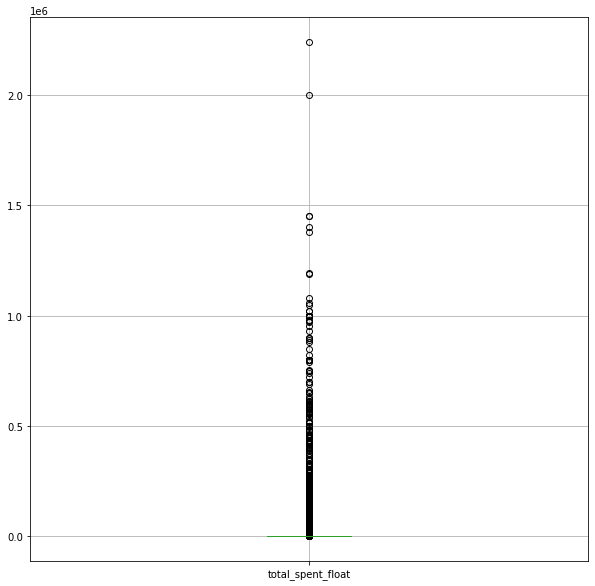

In [68]:
US_idx = np.where((dataset["currency"] == top_5_currencies_symbols[0]))

US = dataset.iloc[US_idx]
US[["total_spent_float"]].boxplot(figsize=(10,10))

Q1 = US[["total_spent_float", "liters_filled", "gallons","cost_per_litre"]].quantile(0.25).values
Q3 = US[["total_spent_float", "liters_filled", "gallons","cost_per_litre"]].quantile(0.75).values

display(US)

IQR = (Q3 - Q1)

scaled_IQR = 1.5*IQR


lower_bound = Q1 - scaled_IQR
upper_bound = Q3 + scaled_IQR

print(lower_bound)
print(upper_bound)


In [69]:
outlier_lower_total_spent_float = np.where((dataset["total_spent_float"] < lower_bound[0]))
dataset.drop(dataset.index[outlier_lower_total_spent_float[0]], axis=0, inplace=True)

outlier_lower_liters_filled = np.where((dataset["liters_filled"] < lower_bound[1]))
dataset.drop(dataset.index[outlier_lower_liters_filled[0]], axis=0, inplace=True)

outlier_lower_gallons = np.where((dataset["gallons"] < lower_bound[2]))
dataset.drop(dataset.index[outlier_lower_gallons[0]], axis=0, inplace=True)

outlier_lower_cost_per_litre = np.where((dataset["cost_per_litre"] < lower_bound[3]))
dataset.drop(dataset.index[outlier_lower_cost_per_litre[0]], axis=0, inplace=True)

print("Array consisting of total spent lower outliers = ",outlier_lower_total_spent_float,"\n\n")
print("Array consisting of liters filled lower outliers = ",outlier_lower_liters_filled,"\n\n")
print("Array consisting of gallons lower outliers = ",outlier_lower_gallons,"\n\n")
print("Array consisting of cost per litre lower outliers = ",outlier_lower_cost_per_litre,"\n\n")

total_lower_outliers = (len(outlier_lower_total_spent_float[0])+
                          len(outlier_lower_liters_filled[0])+
                          len(outlier_lower_gallons[0])+
                          len(outlier_lower_cost_per_litre[0]))

print("Total lower bound outliers for US = ",total_lower_outliers)

Array consisting of total spent lower outliers =  (array([], dtype=int64),) 


Array consisting of liters filled lower outliers =  (array([   1727,    2107,    2161, ..., 1170246, 1172031, 1172336]),) 


Array consisting of gallons lower outliers =  (array([ 42014, 499228, 608908, 677044, 852081, 874243]),) 


Array consisting of cost per litre lower outliers =  (array([    147,     236,     288, ..., 1172543, 1172557, 1172640]),) 


Total lower bound outliers for US =  10956


In [70]:
outlier_upper_total_spent_float = np.where((dataset["total_spent_float"] > upper_bound[0]))
dataset.drop(dataset.index[outlier_upper_total_spent_float[0]], axis=0, inplace=True)

outlier_upper_liters_filled = np.where((dataset["liters_filled"] > upper_bound[1]))
dataset.drop(dataset.index[outlier_upper_liters_filled[0]], axis=0, inplace=True)

outlier_upper_gallons = np.where((dataset["gallons"] > upper_bound[2]))
dataset.drop(dataset.index[outlier_upper_gallons[0]], axis=0, inplace=True)

outlier_upper_cost_per_litre = np.where((dataset["cost_per_litre"] > upper_bound[3]))
dataset.drop(dataset.index[outlier_upper_cost_per_litre[0]], axis=0, inplace=True)

print("Array consisting of total spent upper outliers = ",outlier_upper_total_spent_float,"\n\n")
print("Array consisting of liters filled upper outliers = ",outlier_upper_liters_filled,"\n\n")
print("Array consisting of gallons upper outliers = ",outlier_upper_gallons,"\n\n")
print("Array consisting of cost per litre upper outliers = ",outlier_upper_cost_per_litre,"\n\n")

total_upper_outliers = (len(outlier_upper_total_spent_float[0])+
                          len(outlier_upper_liters_filled[0])+
                          len(outlier_upper_gallons[0])+
                          len(outlier_upper_cost_per_litre[0]))

print("Total upper bound outliers for US = ",total_upper_outliers,"\n")


total_outliers = total_outliers + total_upper_outliers + total_lower_outliers
print("Total number of outliers in the US = ",total_upper_outliers + total_lower_outliers)
print("Total number of outliers = ",total_outliers)

Array consisting of total spent upper outliers =  (array([     10,      25,      32, ..., 1163170, 1163174, 1163188]),) 


Array consisting of liters filled upper outliers =  (array([    17,     19,    142, ..., 977339, 977370, 977398]),) 


Array consisting of gallons upper outliers =  (array([], dtype=int64),) 


Array consisting of cost per litre upper outliers =  (array([    13,     23,     34, ..., 965642, 965700, 965713]),) 


Total upper bound outliers for US =  258766 

Total number of outliers in the US =  269722
Total number of outliers =  269722


<AxesSubplot:>

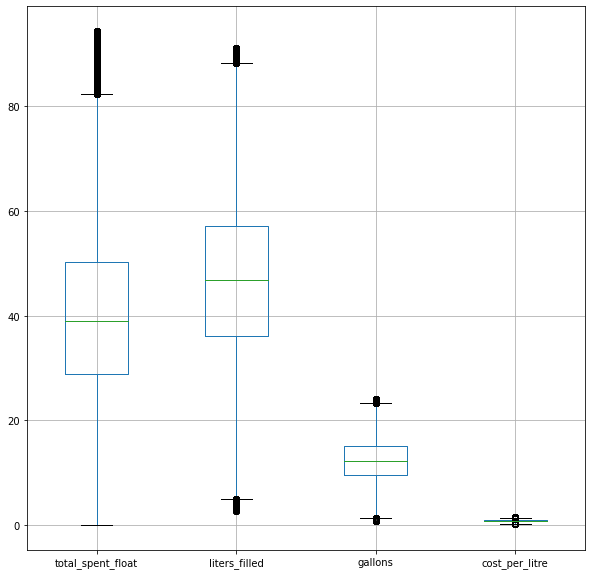

In [71]:
US_idx = np.where((dataset["currency"] == top_5_currencies_symbols[0]))

US = dataset.iloc[US_idx]
US[["total_spent_float", "liters_filled", "gallons","cost_per_litre"]].boxplot(figsize=(10,10))

,date_fueled,date_captured,odometer,gallons,cost_per_gallon,total_spent,mpg,miles,user_url,currency,...,cpg_float,car_make,model,years,UserID,liters_filled,km driven,ltrs/100km,Age,cost_per_litre
2,2012-09-22,2012-09-28,98233.0,7.991,£5.45,£43.53,28.5,227.7435,https://www.somewebsite.com/mercedes-benz/e300...,£,...,5.45,mercedes-benz,e300,1998,133501,36.327086,366.516724,9.911440,14.0,1.439738
3,2019-05-04,2019-05-04,163802.0,10.575,£5.11,£54.00,46.8,494.9100,https://www.somewebsite.com/bmw/320d/2010/247233,£,...,5.11,bmw,320d,2010,247233,48.073950,796.478459,6.035813,9.0,1.349920
40,2014-04-08,2014-04-07,NaN,9.336,£4.92,£45.91,34.1,318.8000,https://www.somewebsite.com/mazda/2/2009/111995,£,...,4.92,mazda,2,2009,111995,42.441456,513.057592,8.272260,5.0,1.299727
45,NaT,2019-01-20,NaN,11.481,£4.61,£52.98,20.8,238.4000,https://www.somewebsite.com/lexus/gs_f/2016/74...,£,...,4.61,lexus,gs_f,2016,749377,52.192626,383.666656,13.603639,NaN,1.217834
49,2015-02-05,2015-02-07,86317.0,15.916,£4.69,£74.65,35.6,566.6096,https://www.somewebsite.com/renault/laguna/201...,£,...,4.69,renault,laguna,2010,232828,72.354136,911.867494,7.934720,5.0,1.238968
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1174829,2022-02-23,2022-02-23,42335.0,9.772,£5.67,£55.45,NaN,NaN,https://www.somewebsite.com/mini/cooper/2019/9...,£,...,5.67,mini,cooper,2019,907401,44.423512,NaN,NaN,3.0,1.497856
1174834,2021-12-14,2022-02-07,116242.0,13.372,£5.29,£70.72,NaN,NaN,https://www.somewebsite.com/bmw/z4/2009/1022610,£,...,5.29,bmw,z4,2009,1022610,60.789112,NaN,NaN,12.0,1.397471
1174846,2015-09-28,2015-11-04,40842.0,13.223,£4.24,£56.01,NaN,NaN,https://www.somewebsite.com/volkswagen/scirocc...,£,...,4.24,volkswagen,scirocco,2011,351261,60.111758,NaN,NaN,4.0,1.120090
1174859,2019-07-09,2019-07-09,14468.0,6.628,£4.80,£31.84,NaN,NaN,https://www.somewebsite.com/mazda/mx-5/2017/90...,£,...,4.80,mazda,mx-5,2017,901831,30.130888,NaN,NaN,2.0,1.268026


[-4.465      -0.513698   -0.113       0.87440991]
[107.015      100.225662    22.047        1.63522577]


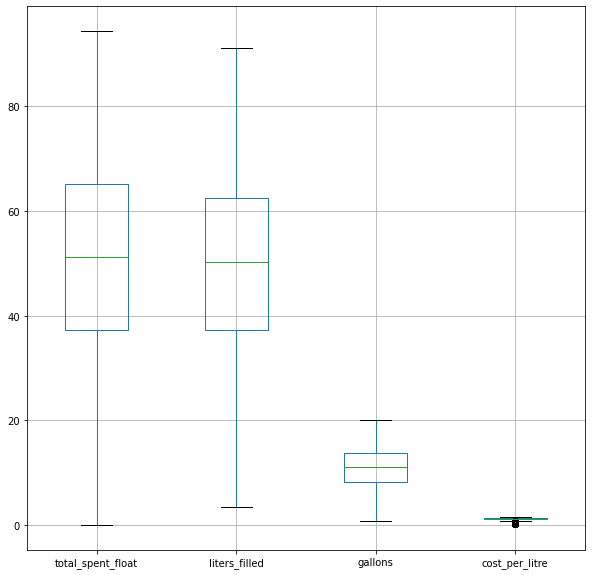

In [72]:

GBP_idx = np.where((dataset["currency"] == top_5_currencies_symbols[1]))

GBP = dataset.iloc[GBP_idx]
dataset.iloc[GBP_idx][["total_spent_float", "liters_filled", "gallons","cost_per_litre"]].boxplot(figsize=(10,10))

Q1 = GBP[["total_spent_float", "liters_filled", "gallons","cost_per_litre"]].quantile(0.25).values
Q3 = GBP[["total_spent_float", "liters_filled", "gallons","cost_per_litre"]].quantile(0.75).values

display(GBP)

IQR = (Q3 - Q1)

scaled_IQR = 1.5*IQR


lower_bound = Q1 - scaled_IQR
upper_bound = Q3 + scaled_IQR

print(lower_bound)
print(upper_bound)


In [73]:
outlier_lower_total_spent_float = np.where((dataset["total_spent_float"] < lower_bound[0]))
dataset.drop(dataset.index[outlier_lower_total_spent_float[0]], axis=0, inplace=True)
outlier_lower_liters_filled = np.where((dataset["liters_filled"] < lower_bound[1]))
dataset.drop(dataset.index[outlier_lower_liters_filled[0]], axis=0, inplace=True)
outlier_lower_gallons = np.where((dataset["gallons"] < lower_bound[2]))
dataset.drop(dataset.index[outlier_lower_gallons[0]], axis=0, inplace=True)
outlier_lower_cost_per_litre = np.where((dataset["cost_per_litre"] < lower_bound[3]))
dataset.drop(dataset.index[outlier_lower_cost_per_litre[0]], axis=0, inplace=True)
print("Array consisting of total spent lower outliers = ",outlier_lower_total_spent_float,"\n\n")
print("Array consisting of tliters filled lower outliers = ",outlier_lower_liters_filled,"\n\n")
print("Array consisting of gallons lower outliers = ",outlier_lower_gallons,"\n\n")
print("Array consisting of cost per litre lower outliers = ",outlier_lower_cost_per_litre,"\n\n")

total_lower_outliers = (len(outlier_lower_total_spent_float[0])+
                          len(outlier_lower_liters_filled[0])+
                          len(outlier_lower_gallons[0])+
                          len(outlier_lower_cost_per_litre[0]))


print("Total lower bound outliers for GBP = ",total_lower_outliers)

Array consisting of total spent lower outliers =  (array([], dtype=int64),) 


Array consisting of tliters filled lower outliers =  (array([], dtype=int64),) 


Array consisting of gallons lower outliers =  (array([], dtype=int64),) 


Array consisting of cost per litre lower outliers =  (array([     4,      7,      9, ..., 904430, 904431, 904434]),) 


Total lower bound outliers for GBP =  368717


Array consisting of total spent upper outliers =  (array([], dtype=int64),) 


Array consisting of tliters filled upper outliers =  (array([], dtype=int64),) 


Array consisting of gallons upper outliers =  (array([    43,    300,    447, ..., 535641, 535684, 535700]),) 


Array consisting of cost per litre upper outliers =  (array([], dtype=int64),) 


Total upper bound outliers for GBP =  2616 

Total number of outliers in the GBP =  371333
Total number of outliers =  641055


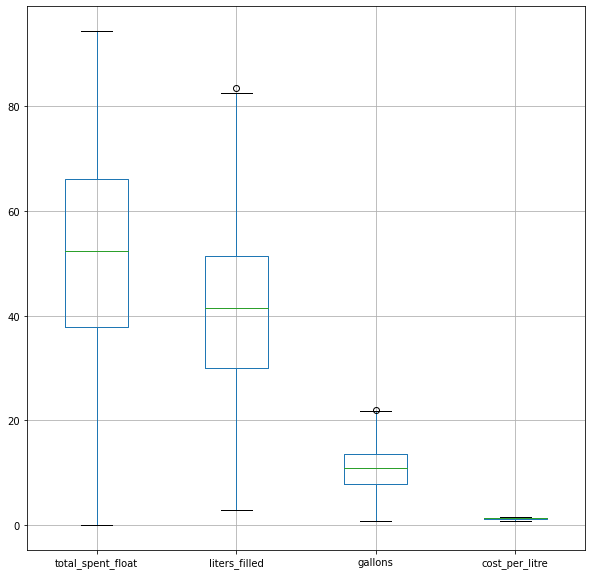

In [74]:
outlier_upper_total_spent_float = np.where((dataset["total_spent_float"] > upper_bound[0]))
dataset.drop(dataset.index[outlier_upper_total_spent_float[0]], axis=0, inplace=True)
outlier_upper_liters_filled = np.where((dataset["liters_filled"] > upper_bound[1]))
dataset.drop(dataset.index[outlier_upper_liters_filled[0]], axis=0, inplace=True)
outlier_upper_gallons = np.where((dataset["gallons"] > upper_bound[2]))
dataset.drop(dataset.index[outlier_upper_gallons[0]], axis=0, inplace=True)
outlier_upper_cost_per_litre = np.where((dataset["cost_per_litre"] > upper_bound[3]))
dataset.drop(dataset.index[outlier_upper_cost_per_litre[0]], axis=0, inplace=True)
print("Array consisting of total spent upper outliers = ",outlier_upper_total_spent_float,"\n\n")
print("Array consisting of tliters filled upper outliers = ",outlier_upper_liters_filled,"\n\n")
print("Array consisting of gallons upper outliers = ",outlier_upper_gallons,"\n\n")
print("Array consisting of cost per litre upper outliers = ",outlier_upper_cost_per_litre,"\n\n")


total_upper_outliers = (len(outlier_upper_total_spent_float[0])+
                          len(outlier_upper_liters_filled[0])+
                          len(outlier_upper_gallons[0])+
                          len(outlier_upper_cost_per_litre[0]))


GBP_idx = np.where((dataset["currency"] == top_5_currencies_symbols[2]))

GBP = dataset.iloc[GBP_idx]
dataset.iloc[GBP_idx][["total_spent_float", "liters_filled", "gallons","cost_per_litre"]].boxplot(figsize=(10,10))


print("Total upper bound outliers for GBP = ",total_upper_outliers,"\n")


total_outliers = total_outliers + total_upper_outliers + total_lower_outliers
total_outliers
print("Total number of outliers in the GBP = ",total_upper_outliers + total_lower_outliers)
print("Total number of outliers = ",total_outliers)

,date_fueled,date_captured,odometer,gallons,cost_per_gallon,total_spent,mpg,miles,user_url,currency,...,cpg_float,car_make,model,years,UserID,liters_filled,km driven,ltrs/100km,Age,cost_per_litre
15,2020-10-01,2020-10-01,12760.0,5.690,€5.26,€29.92,29.200000,166.1480,https://www.somewebsite.com/fiat/124_spider/20...,€,...,5.26,fiat,124_spider,2016,525400,21.538983,267.388622,8.055310,4.0,1.389546
31,2014-01-30,2018-04-14,232795.0,12.870,€5.75,€74.01,33.000000,424.7100,https://www.somewebsite.com/volkswagen/vento/1...,€,...,5.75,volkswagen,vento,1996,788215,48.718227,683.502791,7.127729,18.0,1.518990
41,NaT,2018-08-31,30032.0,1.823,€5.48,€10.00,0.000000,0.0000,https://www.somewebsite.com/volkswagen/touran/...,€,...,5.48,volkswagen,touran,2016,577031,6.900802,0.000000,inf,NaN,1.447664
46,2021-08-09,2021-08-23,159169.0,19.773,€4.35,€86.00,29.700000,587.2581,https://www.somewebsite.com/audi/a6_quattro/20...,€,...,4.35,audi,a6_quattro,2007,839297,74.848912,945.097951,7.919699,14.0,1.149149
79,2019-03-15,2019-03-15,119331.0,13.394,€4.27,€57.14,19.700000,263.8618,https://www.somewebsite.com/bmw/530d/2011/846222,€,...,4.27,bmw,530d,2011,846222,50.701782,424.643349,11.939851,8.0,1.128015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1174768,2014-12-05,2014-12-05,NaN,13.325,€5.55,€73.99,30.311445,403.9000,https://www.somewebsite.com/volkswagen/golf/19...,€,...,5.55,volkswagen,golf,1991,322821,50.440588,650.012426,7.759942,23.0,1.466156
1174786,2021-01-29,2021-01-29,35219.0,12.292,€4.52,€55.60,NaN,NaN,https://www.somewebsite.com/volkswagen/gti/201...,€,...,4.52,volkswagen,gti,2014,784511,46.530260,NaN,NaN,7.0,1.194058
1174804,2019-09-28,2020-01-12,NaN,16.629,€4.81,€80.00,27.091226,450.5000,https://www.somewebsite.com/volkswagen/multiva...,€,...,4.81,volkswagen,multivan,2013,240431,62.947583,725.007670,8.682333,6.0,1.270668
1174822,2011-12-17,2013-12-11,NaN,14.234,€5.53,€78.67,15.118730,215.2000,https://www.somewebsite.com/mazda/rx-8/2003/24...,€,...,5.53,mazda,rx-8,2003,242006,53.881526,346.329968,15.557858,8.0,1.460872


[-4.315      -2.0422287  -0.5395      0.87044732]
[108.205       83.40204583  22.0325       1.74749895]


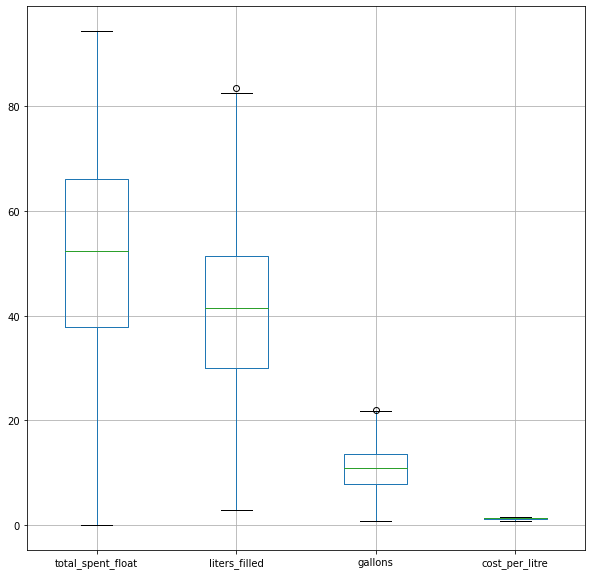

In [75]:
EUR_idx = np.where((dataset["currency"] == top_5_currencies_symbols[2]))

EUR = dataset.iloc[EUR_idx]
dataset.iloc[EUR_idx][["total_spent_float", "liters_filled", "gallons","cost_per_litre"]].boxplot(figsize=(10,10))


Q1 = EUR[["total_spent_float", "liters_filled", "gallons","cost_per_litre"]].quantile(0.25).values
Q3 = EUR[["total_spent_float", "liters_filled", "gallons","cost_per_litre"]].quantile(0.75).values

display(EUR)

IQR = (Q3 - Q1)

scaled_IQR = 1.5*IQR


lower_bound = Q1 - scaled_IQR
upper_bound = Q3 + scaled_IQR

print(lower_bound)
print(upper_bound)

In [76]:
outlier_lower_total_spent_float = np.where((dataset["total_spent_float"] < lower_bound[0]))
dataset.drop(dataset.index[outlier_lower_total_spent_float[0]], axis=0, inplace=True)
outlier_lower_liters_filled = np.where((dataset["liters_filled"] < lower_bound[1]))
dataset.drop(dataset.index[outlier_lower_liters_filled[0]], axis=0, inplace=True)
outlier_lower_gallons = np.where((dataset["gallons"] < lower_bound[2]))
dataset.drop(dataset.index[outlier_lower_gallons[0]], axis=0, inplace=True)
outlier_lower_cost_per_litre = np.where((dataset["cost_per_litre"] < lower_bound[3]))
dataset.drop(dataset.index[outlier_lower_cost_per_litre[0]], axis=0, inplace=True)
print("Array consisting of total spent lower outliers = ",outlier_lower_total_spent_float,"\n\n")
print("Array consisting of tliters filled lower outliers = ",outlier_lower_liters_filled,"\n\n")
print("Array consisting of gallons lower outliers = ",outlier_lower_gallons,"\n\n")
print("Array consisting of cost per litre lower outliers = ",outlier_lower_cost_per_litre,"\n\n")

total_lower_outliers = (len(outlier_lower_total_spent_float[0])+
                          len(outlier_lower_liters_filled[0])+
                          len(outlier_lower_gallons[0])+
                          len(outlier_lower_cost_per_litre[0]))

print("Total lower bound outliers for EUR = ",total_lower_outliers)

Array consisting of total spent lower outliers =  (array([], dtype=int64),) 


Array consisting of tliters filled lower outliers =  (array([], dtype=int64),) 


Array consisting of gallons lower outliers =  (array([], dtype=int64),) 


Array consisting of cost per litre lower outliers =  (array([], dtype=int64),) 


Total lower bound outliers for EUR =  0


Array consisting of total spent upper outliers =  (array([], dtype=int64),) 


Array consisting of tliters filled upper outliers =  (array([   180,    328,    561, ..., 530448, 530715, 531939]),) 


Array consisting of gallons upper outliers =  (array([], dtype=int64),) 


Array consisting of cost per litre upper outliers =  (array([], dtype=int64),) 


Total upper bound outliers for EUR =  1053 

Total number of outliers in the EUR =  1053
Total number of outliers =  642108


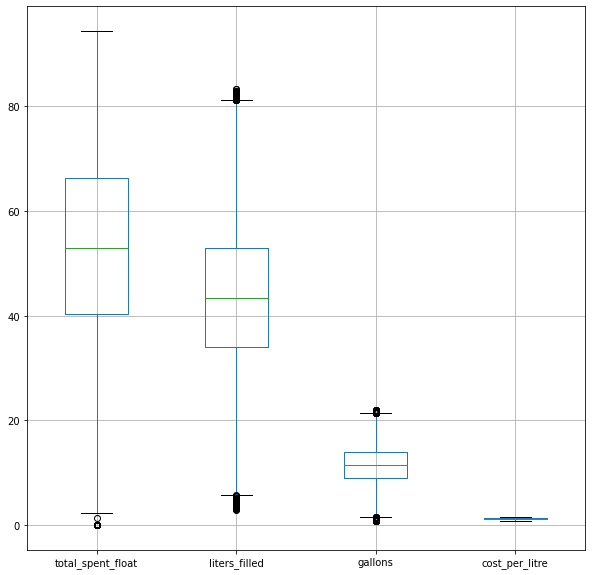

In [77]:
outlier_upper_total_spent_float = np.where((dataset["total_spent_float"] > upper_bound[0]))
dataset.drop(dataset.index[outlier_upper_total_spent_float[0]], axis=0, inplace=True)
outlier_upper_liters_filled = np.where((dataset["liters_filled"] > upper_bound[1]))
dataset.drop(dataset.index[outlier_upper_liters_filled[0]], axis=0, inplace=True)
outlier_upper_gallons = np.where((dataset["gallons"] > upper_bound[2]))
dataset.drop(dataset.index[outlier_upper_gallons[0]], axis=0, inplace=True)
outlier_upper_cost_per_litre = np.where((dataset["cost_per_litre"] > upper_bound[3]))
dataset.drop(dataset.index[outlier_upper_cost_per_litre[0]], axis=0, inplace=True)
print("Array consisting of total spent upper outliers = ",outlier_upper_total_spent_float,"\n\n")
print("Array consisting of tliters filled upper outliers = ",outlier_upper_liters_filled,"\n\n")
print("Array consisting of gallons upper outliers = ",outlier_upper_gallons,"\n\n")
print("Array consisting of cost per litre upper outliers = ",outlier_upper_cost_per_litre,"\n\n")

total_upper_outliers = (len(outlier_upper_total_spent_float[0])+
                          len(outlier_upper_liters_filled[0])+
                          len(outlier_upper_gallons[0])+
                          len(outlier_upper_cost_per_litre[0]))



EUR_idx = np.where((dataset["currency"] == top_5_currencies_symbols[3]))

EUR = dataset.iloc[EUR_idx]
dataset.iloc[EUR_idx][["total_spent_float", "liters_filled", "gallons","cost_per_litre"]].boxplot(figsize=(10,10))


print("Total upper bound outliers for EUR = ",total_upper_outliers,"\n")

total_outliers = total_outliers + total_upper_outliers + total_lower_outliers
total_outliers


print("Total number of outliers in the EUR = ",total_upper_outliers + total_lower_outliers)
print("Total number of outliers = ",total_outliers)

,date_fueled,date_captured,odometer,gallons,cost_per_gallon,total_spent,mpg,miles,user_url,currency,...,cpg_float,car_make,model,years,UserID,liters_filled,km driven,ltrs/100km,Age,cost_per_litre
60,2021-05-20,2021-05-20,193277.0,14.194,CA$4.92,CA$69.80,0.00000,0.0000,https://www.somewebsite.com/mercedes-benz/300e...,CA$,...,4.92,mercedes-benz,300e,1990,1066438,53.730110,0.000000,inf,31.0,1.299727
203,NaT,2022-02-17,NaN,14.473,CA$5.67,CA$82.07,22.80000,329.9000,https://www.somewebsite.com/hyundai/tucson/201...,CA$,...,5.67,hyundai,tucson,2013,254763,54.786239,530.921266,10.319089,NaN,1.497856
221,2022-01-03,2022-01-03,6232.0,14.191,CA$5.14,CA$73.01,18.00000,255.4380,https://www.somewebsite.com/volkswagen/atlas/2...,CA$,...,5.14,volkswagen,atlas,2021,1071827,53.718753,411.086591,13.067503,1.0,1.357845
245,2010-04-01,2010-04-09,87674.0,8.152,CA$3.63,CA$29.59,34.20000,278.7984,https://www.somewebsite.com/kia/rio/2001/37284,CA$,...,3.63,kia,rio,2001,37284,30.858662,448.681417,6.877633,9.0,0.958945
257,2020-09-28,2020-11-13,86167.0,11.393,CA$4.77,CA$54.30,21.10000,240.3923,https://www.somewebsite.com/mitsubishi/outland...,CA$,...,4.77,mitsubishi,outlander,2011,756361,43.127176,386.872944,11.147633,9.0,1.260101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1174685,2019-05-06,2019-10-07,174746.0,10.559,CA$4.83,CA$51.00,NaN,NaN,https://www.somewebsite.com/jeep/compass/2007/...,CA$,...,4.83,jeep,compass,2007,959759,39.970144,NaN,NaN,12.0,1.275952
1174690,2019-07-22,2019-07-25,69324.0,13.946,CA$5.26,CA$73.33,NaN,NaN,https://www.somewebsite.com/subaru/legacy/2009...,CA$,...,5.26,subaru,legacy,2009,642130,52.791328,NaN,NaN,10.0,1.389546
1174789,2017-01-29,2017-02-13,NaN,4.736,CA$3.80,CA$18.00,21.09375,99.9000,https://www.somewebsite.com/bmw/128i/2012/300570,CA$,...,3.80,bmw,128i,2012,300570,17.927702,160.773066,11.150936,5.0,1.003854
1174796,NaT,2022-02-06,81919.0,13.282,CA$4.10,CA$54.44,NaN,NaN,https://www.somewebsite.com/ford/ranger/1991/1...,CA$,...,4.10,ford,ranger,1991,1125001,50.277816,NaN,NaN,NaN,1.083106


[1.34       5.77842837 1.5265     0.7528907 ]
[105.18        81.07780408  21.4185       1.74617809]


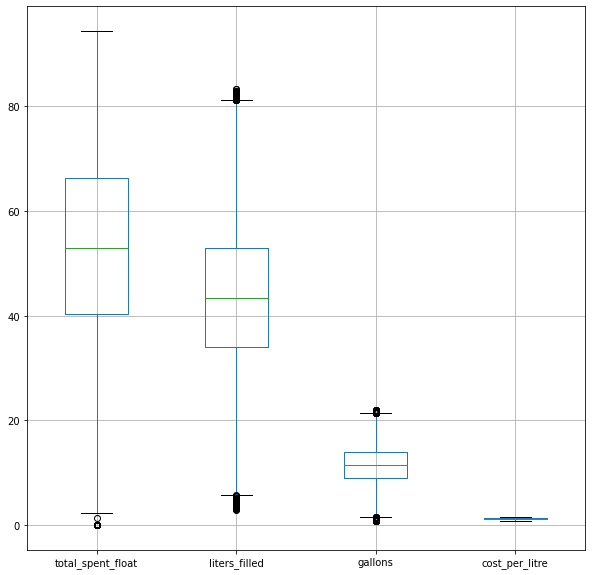

In [78]:
CAD_idx = np.where((dataset["currency"] == top_5_currencies_symbols[3]))

CAD = dataset.iloc[CAD_idx]
dataset.iloc[CAD_idx][["total_spent_float", "liters_filled", "gallons","cost_per_litre"]].boxplot(figsize=(10,10))
Q1 = CAD[["total_spent_float", "liters_filled", "gallons","cost_per_litre"]].quantile(0.25).values
Q3 = CAD[["total_spent_float", "liters_filled", "gallons","cost_per_litre"]].quantile(0.75).values

display(CAD)

IQR = (Q3 - Q1)

scaled_IQR = 1.5*IQR


lower_bound = Q1 - scaled_IQR
upper_bound = Q3 + scaled_IQR

print(lower_bound)
print(upper_bound)

In [79]:
outlier_lower_total_spent_float = np.where((dataset["total_spent_float"] < lower_bound[0]))
dataset.drop(dataset.index[outlier_lower_total_spent_float[0]], axis=0, inplace=True)
outlier_lower_liters_filled = np.where((dataset["liters_filled"] < lower_bound[1]))
dataset.drop(dataset.index[outlier_lower_liters_filled[0]], axis=0, inplace=True)
outlier_lower_gallons = np.where((dataset["gallons"] < lower_bound[2]))
dataset.drop(dataset.index[outlier_lower_gallons[0]], axis=0, inplace=True)
outlier_lower_cost_per_litre = np.where((dataset["cost_per_litre"] < lower_bound[3]))
dataset.drop(dataset.index[outlier_lower_cost_per_litre[0]], axis=0, inplace=True)
print("Array consisting of total spent lower outliers = ",outlier_lower_total_spent_float,"\n\n")
print("Array consisting of tliters filled lower outliers = ",outlier_lower_liters_filled,"\n\n")
print("Array consisting of gallons lower outliers = ",outlier_lower_gallons,"\n\n")
print("Array consisting of cost per litre lower outliers = ",outlier_lower_cost_per_litre,"\n\n")

total_lower_outliers = (len(outlier_lower_total_spent_float[0])+
                          len(outlier_lower_liters_filled[0])+
                          len(outlier_lower_gallons[0])+
                          len(outlier_lower_cost_per_litre[0]))

print("Total lower bound outliers for CAD = ",total_lower_outliers)

Array consisting of total spent lower outliers =  (array([     9,     11,    439, ..., 531833, 531938, 532040]),) 


Array consisting of tliters filled lower outliers =  (array([   823,    974,   2251,   3311,   3577,   4271,   4488,   4510,
         4576,   4588,   4596,   5338,   5415,   5736,   5845,   6061,
         7225,   7263,   7561,   8877,  10642,  10818,  11094,  11169,
        11656,  11902,  12133,  14122,  14185,  14364,  14370,  14576,
        15396,  16610,  17414,  17422,  18539,  18940,  19100,  19493,
        19785,  20224,  21681,  23893,  23905,  27077,  27207,  27281,
        28312,  28700,  29287,  29289,  29330,  30569,  30656,  32695,
        32717,  33593,  33941,  34620,  34836,  35517,  36487,  36863,
        37801,  38068,  38375,  38617,  39015,  40365,  42440,  43390,
        43541,  44479,  44900,  45304,  46151,  46693,  47772,  48318,
        49289,  50023,  50732,  51486,  52868,  53081,  53098,  53798,
        54599,  54694,  55297,  55585,  56047,  

In [80]:
outlier_upper_total_spent_float = np.where((dataset["total_spent_float"] > upper_bound[0]))
dataset.drop(dataset.index[outlier_upper_total_spent_float[0]], axis=0, inplace=True)
outlier_upper_liters_filled = np.where((dataset["liters_filled"] > upper_bound[1]))
dataset.drop(dataset.index[outlier_upper_liters_filled[0]], axis=0, inplace=True)
outlier_upper_gallons = np.where((dataset["gallons"] > upper_bound[2]))
dataset.drop(dataset.index[outlier_upper_gallons[0]], axis=0, inplace=True)
outlier_upper_cost_per_litre = np.where((dataset["cost_per_litre"] > upper_bound[3]))
dataset.drop(dataset.index[outlier_upper_cost_per_litre[0]], axis=0, inplace=True)
print("Array consisting of total spent upper outliers = ",outlier_upper_total_spent_float,"\n\n")
print("Array consisting of tliters filled upper outliers = ",outlier_upper_liters_filled,"\n\n")
print("Array consisting of gallons upper outliers = ",outlier_upper_gallons,"\n\n")
print("Array consisting of cost per litre upper outliers = ",outlier_upper_cost_per_litre,"\n\n")

total_upper_outliers = (len(outlier_upper_total_spent_float[0])+
                          len(outlier_upper_liters_filled[0])+
                          len(outlier_upper_gallons[0])+
                          len(outlier_upper_cost_per_litre[0]))

print(total_upper_total_spent)


CAD_idx = np.where((dataset["currency"] == top_5_currencies_symbols[3]))

CAD = dataset.iloc[CAD_idx]
dataset.iloc[CAD_idx][["total_spent_float", "liters_filled", "gallons","cost_per_litre"]].boxplot(figsize=(10,10))

print("Total upper bound outliers for CAD = ",total_upper_outliers,"\n")

total_outliers = total_outliers + total_upper_outliers + total_lower_outliers
total_outliers

print("Total number of outliers in the CAD = ",total_upper_outliers + total_lower_outliers)
print("Total number of outliers = ",total_outliers)

Array consisting of total spent upper outliers =  (array([], dtype=int64),) 


Array consisting of tliters filled upper outliers =  (array([    17,    163,    212, ..., 524182, 524398, 524638]),) 


Array consisting of gallons upper outliers =  (array([], dtype=int64),) 


Array consisting of cost per litre upper outliers =  (array([], dtype=int64),) 




NameError: name 'total_upper_total_spent' is not defined

,date_fueled,date_captured,odometer,gallons,cost_per_gallon,total_spent,mpg,miles,user_url,currency,...,cpg_float,car_make,model,years,UserID,liters_filled,km driven,ltrs/100km,Age,cost_per_litre
36207,NaT,2020-11-22,23531.0,5.548,R4.87,R27.01,0.0,0.0000,https://www.somewebsite.com/suzuki/swift/2015/...,R,...,4.87,suzuki,swift,2015,981500,21.001455,0.000000,inf,NaN,1.286519
51448,2011-12-01,2011-12-02,103498.0,11.624,R4.92,R57.20,30.1,349.8824,https://www.somewebsite.com/volkswagen/bora/20...,R,...,4.92,volkswagen,bora,2001,77592,44.001606,563.079742,7.814454,10.0,1.299727
53661,NaT,2008-09-12,95572.0,7.793,R3.56,R27.76,0.0,0.0000,https://www.somewebsite.com/audi/a3/2001/9281,R,...,3.56,audi,a3,2001,9281,29.499700,0.000000,inf,NaN,0.940453
60074,2017-04-19,2017-04-19,NaN,12.202,R3.85,R46.93,25.5,310.9000,https://www.somewebsite.com/ford/transit_custo...,R,...,3.85,ford,transit_custom,2015,449935,46.189573,500.343806,9.231567,2.0,1.017063
95795,2020-11-19,2020-11-19,139503.0,12.403,R5.52,R68.50,NaN,NaN,https://www.somewebsite.com/nissan/tiida/2007/...,R,...,5.52,nissan,tiida,2007,408190,46.950440,NaN,NaN,13.0,1.458230
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1093949,2020-08-05,2020-08-05,64750.0,12.680,R4.12,R52.27,NaN,NaN,https://www.somewebsite.com/bmw/m135i/2013/817666,R,...,4.12,bmw,m135i,2013,817666,47.998999,NaN,NaN,7.0,1.088389
1143357,2021-04-18,2021-04-18,946.0,8.965,R5.67,R50.87,NaN,NaN,https://www.somewebsite.com/ford/ecosport/2020...,R,...,5.67,ford,ecosport,2020,1012019,33.936201,NaN,NaN,1.0,1.497856
1145831,2021-05-30,2021-05-30,68389.0,13.209,R5.41,R71.45,NaN,NaN,https://www.somewebsite.com/bmw/m135i/2013/817666,R,...,5.41,bmw,m135i,2013,817666,50.001481,NaN,NaN,8.0,1.429171
1152680,2017-03-12,2017-03-12,NaN,13.507,R5.04,R68.00,NaN,NaN,https://www.somewebsite.com/suzuki/grand_vitar...,R,...,5.04,suzuki,grand_vitara,2010,532148,51.129533,NaN,NaN,7.0,1.331428


[-4.355       9.87518834  2.60875     0.64590097]
[114.625       78.15641392  20.64675      1.81882544]


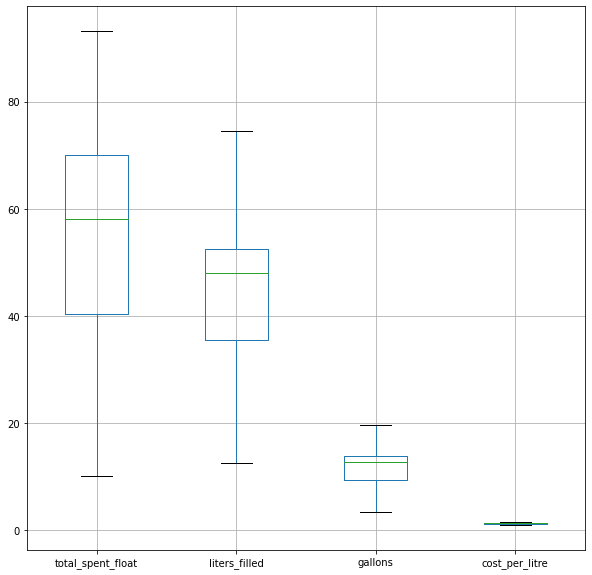

In [81]:
ZAR_idx = np.where((dataset["currency"] == top_5_currencies_symbols[4]))

ZAR = dataset.iloc[ZAR_idx]
dataset.iloc[ZAR_idx][["total_spent_float", "liters_filled", "gallons","cost_per_litre"]].boxplot(figsize=(10,10))

Q1 = ZAR[["total_spent_float", "liters_filled", "gallons","cost_per_litre"]].quantile(0.25).values
Q3 = ZAR[["total_spent_float", "liters_filled", "gallons","cost_per_litre"]].quantile(0.75).values

display(ZAR)

IQR = (Q3 - Q1)

scaled_IQR = 1.5*IQR


lower_bound = Q1 - scaled_IQR
upper_bound = Q3 + scaled_IQR

print(lower_bound)
print(upper_bound)

In [82]:
outlier_lower_total_spent_float = np.where((dataset["total_spent_float"] < lower_bound[0]))
dataset.drop(dataset.index[outlier_lower_total_spent_float[0]], axis=0, inplace=True)
outlier_lower_liters_filled = np.where((dataset["liters_filled"] < lower_bound[1]))
dataset.drop(dataset.index[outlier_lower_liters_filled[0]], axis=0, inplace=True)
outlier_lower_gallons = np.where((dataset["gallons"] < lower_bound[2]))
dataset.drop(dataset.index[outlier_lower_gallons[0]], axis=0, inplace=True)
outlier_lower_cost_per_litre = np.where((dataset["cost_per_litre"] < lower_bound[3]))
dataset.drop(dataset.index[outlier_lower_cost_per_litre[0]], axis=0, inplace=True)
print("Array consisting of total spent lower outliers = ",outlier_lower_total_spent_float,"\n\n")
print("Array consisting of tliters filled lower outliers = ",outlier_lower_liters_filled,"\n\n")
print("Array consisting of gallons lower outliers = ",outlier_lower_gallons,"\n\n")
print("Array consisting of cost per litre lower outliers = ",outlier_lower_cost_per_litre,"\n\n")

total_lower_outliers = (len(outlier_lower_total_spent_float[0])+
                          len(outlier_lower_liters_filled[0])+
                          len(outlier_lower_gallons[0])+
                          len(outlier_lower_cost_per_litre[0]))

print("Total lower bound outliers for ZAR = ",total_lower_outliers)

Array consisting of total spent lower outliers =  (array([], dtype=int64),) 


Array consisting of tliters filled lower outliers =  (array([    18,    288,    320, ..., 522550, 522596, 522972]),) 


Array consisting of gallons lower outliers =  (array([  3607,   4928,   5431,  10067,  10571,  11573,  14649,  14886,
        15659,  16343,  16522,  17016,  20390,  20914,  22885,  24243,
        25130,  26175,  26668,  27844,  32737,  37717,  37943,  38142,
        42376,  43813,  45049,  46954,  50610,  50694,  51068,  51435,
        53065,  57361,  59244,  59803,  60579,  62324,  65356,  66563,
        66680,  66728,  70089,  70164,  72178,  72218,  73313,  75133,
        78623,  79721,  80001,  80971,  81105,  81625,  81902,  84209,
        86318,  86660,  89705,  90558,  90914,  91855,  91932,  92876,
        93123,  96899,  97056,  98777, 101952, 103105, 104103, 108935,
       110770, 112438, 112632, 120050, 121972, 125717, 126446, 128575,
       129334, 129365, 132181, 134398, 13551

In [83]:
outlier_upper_total_spent_float = np.where((dataset["total_spent_float"] > upper_bound[0]))
dataset.drop(dataset.index[outlier_upper_total_spent_float[0]], axis=0, inplace=True)
outlier_upper_liters_filled = np.where((dataset["liters_filled"] > upper_bound[1]))
dataset.drop(dataset.index[outlier_upper_liters_filled[0]], axis=0, inplace=True)
outlier_upper_gallons = np.where((dataset["gallons"] > upper_bound[2]))
dataset.drop(dataset.index[outlier_upper_gallons[0]], axis=0, inplace=True)
outlier_upper_cost_per_litre = np.where((dataset["cost_per_litre"] > upper_bound[3]))
dataset.drop(dataset.index[outlier_upper_cost_per_litre[0]], axis=0, inplace=True)
print("Array consisting of total spent upper outliers = ",outlier_upper_total_spent_float,"\n\n")
print("Array consisting of tliters filled upper outliers = ",outlier_upper_liters_filled,"\n\n")
print("Array consisting of gallons upper outliers = ",outlier_upper_gallons,"\n\n")
print("Array consisting of cost per litre upper outliers = ",outlier_upper_cost_per_litre,"\n\n")


total_upper_outliers = (len(outlier_upper_total_spent_float[0])+
                          len(outlier_upper_liters_filled[0])+
                          len(outlier_upper_gallons[0])+
                          len(outlier_upper_cost_per_litre[0]))


print("Total upper bound outliers for ZAR = ",total_upper_outliers,"\n")

total_outliers = total_outliers + total_upper_total_spent + total_lower_total_spent
total_outliers

print("Total number of outliers in the ZAR = ",total_upper_outliers + total_lower_outliers)
print("Total number of outliers = ",total_outliers)

Array consisting of total spent upper outliers =  (array([], dtype=int64),) 


Array consisting of tliters filled upper outliers =  (array([   152,    214,    601, ..., 518583, 518734, 518838]),) 


Array consisting of gallons upper outliers =  (array([], dtype=int64),) 


Array consisting of cost per litre upper outliers =  (array([], dtype=int64),) 


Total upper bound outliers for ZAR =  3437 



NameError: name 'total_upper_total_spent' is not defined

In [ ]:
i = np.where((dataset["currency"] == top_5_currencies_symbols[0])|
         (dataset["currency"] == top_5_currencies_symbols[1])|
         (dataset["currency"] == top_5_currencies_symbols[2])|
         (dataset["currency"] == top_5_currencies_symbols[3])|
         (dataset["currency"] == top_5_currencies_symbols[4])
        )

In [84]:
dataset = dataset.iloc[i]
display(dataset)

NameError: name 'i' is not defined

<h2>Fuel Efficiency</h2>

In [85]:

a = list(dataset.groupby("currency").count().index)
a.remove('R')


data = {
    "currencies":a,
    "conversion rate":[16.16,12.51,19.82,16.83],
    "source":["https://www.xe.com/currencyconverter/convert/?Amount=1&From=USD&To=ZAR",
              "https://www.xe.com/currencyconverter/convert/?Amount=1&From=CAD&To=ZAR",
             "https://www.xe.com/currencyconverter/convert/?Amount=1&From=GBP&To=ZAR",
             "https://www.xe.com/currencyconverter/convert/?Amount=1&From=EUR&To=ZAR"]
}

conversion_rate = pd.DataFrame(data)


ValueError: All arrays must be of the same length

In [86]:

conversion_rate

NameError: name 'conversion_rate' is not defined

<h3>1.</h3>

In [87]:
Jan_2022 = np.where((dataset["date_fueled"].dt.year == 2022) & (dataset["date_fueled"].dt.month == 1))

[Text(0.5, 1.0, '$')]

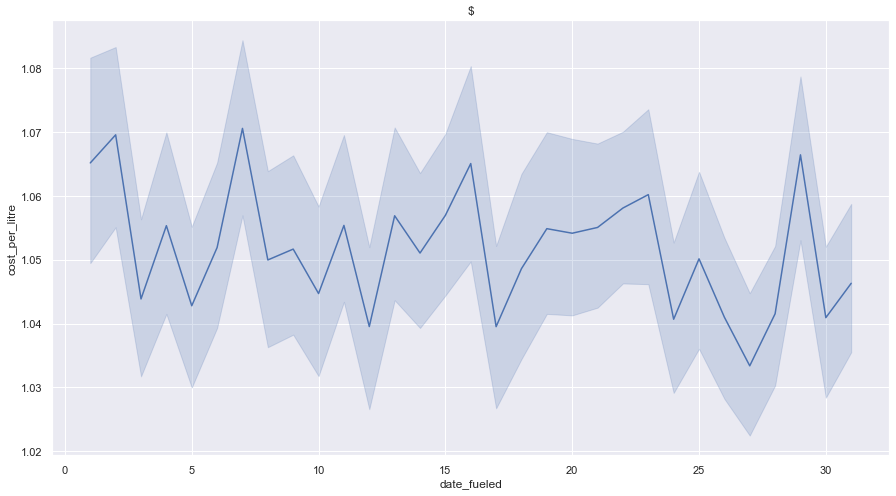

In [88]:
cur = dataset.groupby("currency").count().index[0]
#print(cur)
j = np.where((dataset.iloc[Jan_2022]["currency"] == cur )) 
#display(dataset.iloc[Jan_2022].iloc[j])
x = dataset.iloc[Jan_2022].iloc[j]["date_fueled"].dt.day


y = dataset.iloc[Jan_2022].iloc[j]["cost_per_litre"]

sns.set(rc = {'figure.figsize':(15,8)})
sns.lineplot(x=x, y=y).set(title=cur)

[Text(0.5, 1.0, 'AED')]

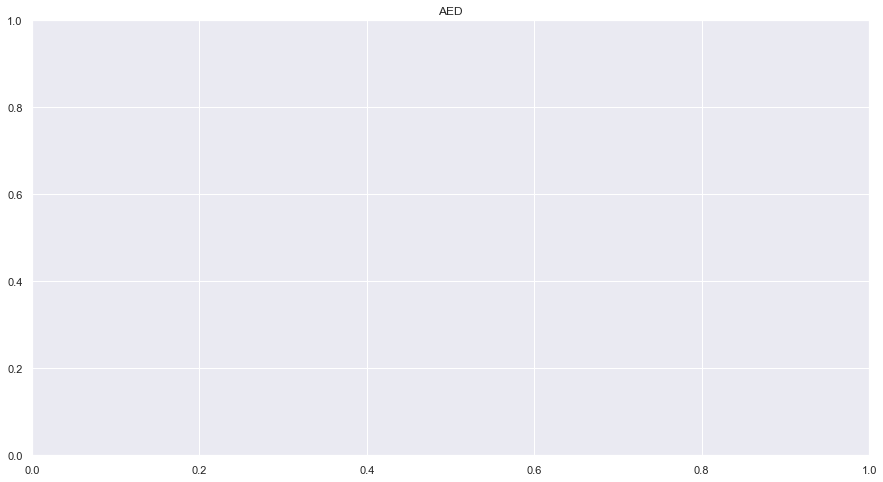

In [89]:

cur = dataset.groupby("currency").count().index[1]
#print(cur)

j = np.where((dataset.iloc[Jan_2022]["currency"] == cur)) 
#display(dataset.iloc[Jan_2022].iloc[j])
x = dataset.iloc[Jan_2022].iloc[j]["date_fueled"].dt.day


y = dataset.iloc[Jan_2022].iloc[j]["cost_per_litre"]

sns.set(rc = {'figure.figsize':(15,8)})
sns.lineplot(x=x, y=y).set(title=cur)

[Text(0.5, 1.0, 'ALL')]

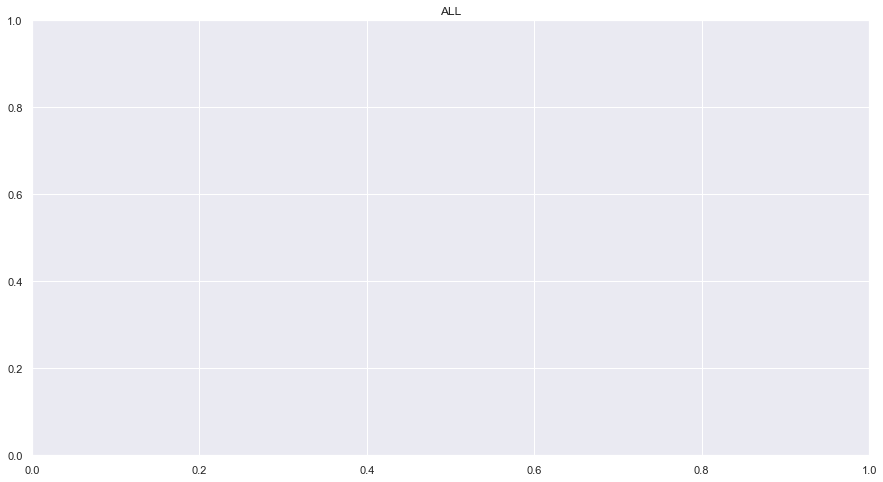

In [90]:
cur = dataset.groupby("currency").count().index[2]
#print(cur)
j = np.where((dataset.iloc[Jan_2022]["currency"] == cur )) 
#display(dataset.iloc[Jan_2022].iloc[j])
x = dataset.iloc[Jan_2022].iloc[j]["date_fueled"].dt.day


y = dataset.iloc[Jan_2022].iloc[j]["cost_per_litre"]

sns.set(rc = {'figure.figsize':(15,8)})
sns.lineplot(x=x, y=y).set(title=cur)

[Text(0.5, 1.0, 'AR$')]

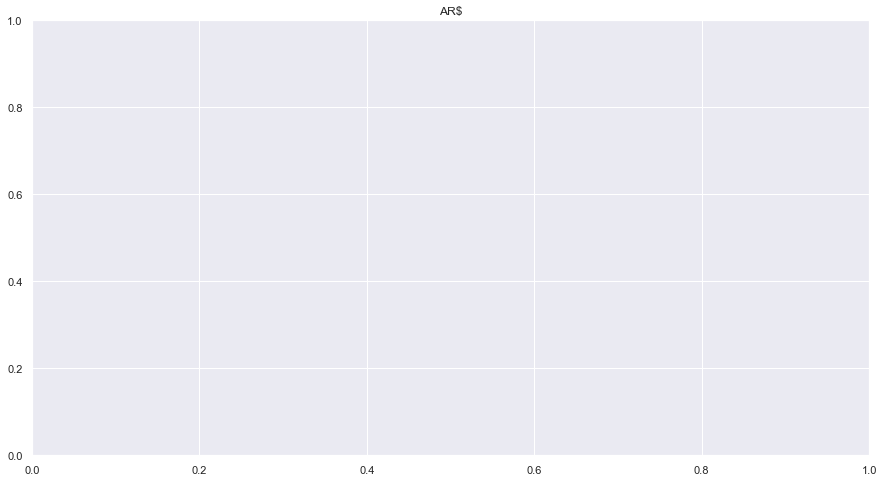

In [91]:
cur = dataset.groupby("currency").count().index[3]
#print(cur)
j = np.where((dataset.iloc[Jan_2022]["currency"] == cur )) 
#display(dataset.iloc[Jan_2022].iloc[j])
x = dataset.iloc[Jan_2022].iloc[j]["date_fueled"].dt.day


y = dataset.iloc[Jan_2022].iloc[j]["cost_per_litre"]

sns.set(rc = {'figure.figsize':(15,8)})
sns.lineplot(x=x, y=y).set(title=cur)

[Text(0.5, 1.0, 'AU$')]

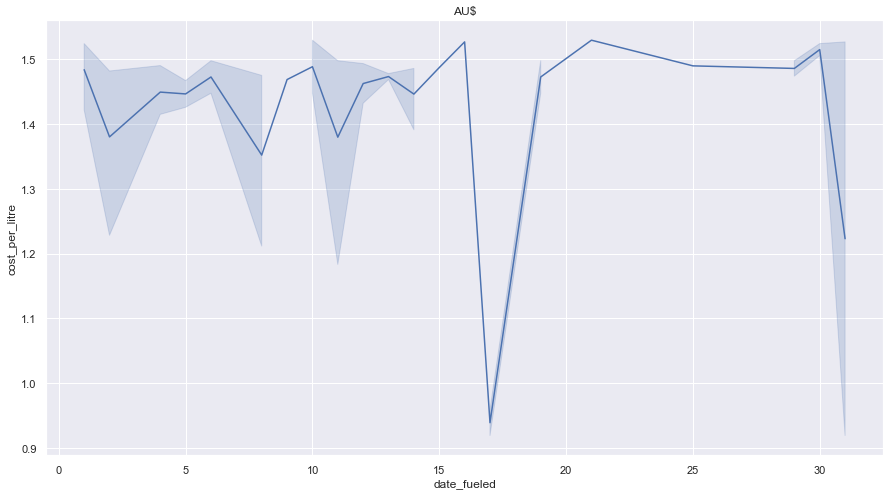

In [92]:
cur = dataset.groupby("currency").count().index[4]
#print(cur)
j = np.where((dataset.iloc[Jan_2022]["currency"] == cur )) 
#display(dataset.iloc[Jan_2022].iloc[j])
x = dataset.iloc[Jan_2022].iloc[j]["date_fueled"].dt.day


y = dataset.iloc[Jan_2022].iloc[j]["cost_per_litre"]

sns.set(rc = {'figure.figsize':(15,8)})
sns.lineplot(x=x, y=y).set(title=cur)

In [93]:

dif_day = dataset["date_fueled"].iloc[Jan_2022].dt.day.values
dif_currency = dataset["currency"].iloc[Jan_2022].values
dif_cost_per_litre = dataset["cost_per_litre"].iloc[Jan_2022].values

b = dataset["currency"].iloc[Jan_2022]
 


data = {
    "day":dif_day,
    "currency":dif_currency,
    "cost_per_litre":dif_cost_per_litre
}
dif = pd.DataFrame(data)


In [94]:
i = np.where((b == '$'))
dataset.iloc[i]

,date_fueled,date_captured,odometer,gallons,cost_per_gallon,total_spent,mpg,miles,user_url,currency,...,cpg_float,car_make,model,years,UserID,liters_filled,km driven,ltrs/100km,Age,cost_per_litre
0,NaT,2022-04-07,73370.0,NaN,NaN,NaN,NaN,NaN,https://www.somewebsite.com/suzuki/swift/2015/...,None,...,NaN,suzuki,swift,2015,674857,NaN,NaN,NaN,NaN,NaN
1,2012-11-07,2016-08-30,11983.0,12.120,$5.599,$67.86,31.6,382.9920,https://www.somewebsite.com/bmw/x3/2009/461150,$,...,5.599,bmw,x3,2009,461150,45.879169,616.364345,7.443514,3.0,1.479100
2,2012-09-22,2012-09-28,98233.0,7.991,£5.45,£43.53,28.5,227.7435,https://www.somewebsite.com/mercedes-benz/e300...,£,...,5.450,mercedes-benz,e300,1998,133501,36.327086,366.516724,9.911440,14.0,1.439738
3,2019-05-04,2019-05-04,163802.0,10.575,£5.11,£54.00,46.8,494.9100,https://www.somewebsite.com/bmw/320d/2010/247233,£,...,5.110,bmw,320d,2010,247233,48.073950,796.478459,6.035813,9.0,1.349920
5,2021-10-23,2021-10-23,147567.0,3.413,$3.739,$12.76,29.0,98.9770,https://www.somewebsite.com/volkswagen/passat/...,$,...,3.739,volkswagen,passat,2004,445811,12.919604,159.287645,8.110864,17.0,0.987740
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44164,2022-02-22,2022-02-22,NaN,10.889,£5.48,£59.65,36.8,400.2000,https://www.somewebsite.com/suzuki/vitara/2018...,£,...,5.480,suzuki,vitara,2018,1064265,49.501394,644.057868,7.685861,4.0,1.447664
44175,2011-07-06,2016-09-09,53885.0,15.590,£5.03,£78.43,26.4,411.5760,https://www.somewebsite.com/audi/a6/2005/499809,£,...,5.030,audi,a6,2005,499809,70.872140,662.365720,10.699850,6.0,1.328786
44179,2022-02-05,2022-02-05,109604.0,19.556,$3.789,$74.10,22.2,434.1432,https://www.somewebsite.com/honda/odyssey/2016...,$,...,3.789,honda,odyssey,2016,942853,74.027478,698.684017,10.595273,6.0,1.000948
44180,2021-10-20,2021-10-20,165541.0,17.766,$4.399,$78.15,18.1,321.5646,https://www.somewebsite.com/bmw/530i/2002/869353,$,...,4.399,bmw,530i,2002,869353,67.251594,517.506773,12.995307,19.0,1.162093


<AxesSubplot:xlabel='day', ylabel='cost_per_litre'>

/home/william/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 8372 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/william/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 8372 missing from current font.
  font.set_text(s, 0, flags=flags)


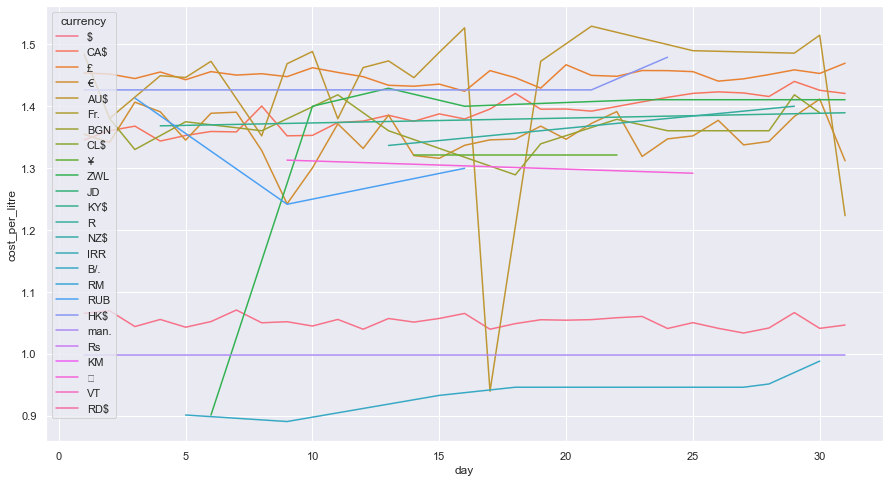

In [95]:
sns.lineplot(data=dif, x="day", y="cost_per_litre", hue="currency",ci=None)

<h3>Conclusion</h3>

<h3>2.</h3>

In [106]:
dataset['odometer'].isna().sum()

71762

### 3.

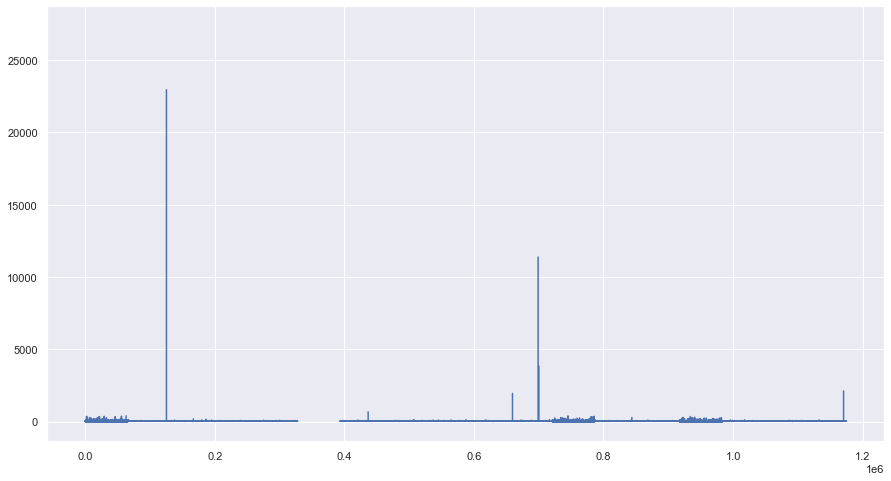

In [111]:
plt.plot(dataset['mpg'])


In [114]:
data_SA = dataset[dataset['currency'] == 'R']
data_SA

,date_fueled,date_captured,odometer,gallons,cost_per_gallon,total_spent,mpg,miles,user_url,currency,...,cpg_float,car_make,model,years,UserID,liters_filled,km driven,ltrs/100km,Age,cost_per_litre
36207,NaT,2020-11-22,23531.0,5.548,R4.87,R27.01,0.0,0.0000,https://www.somewebsite.com/suzuki/swift/2015/...,R,...,4.87,suzuki,swift,2015,981500,21.001455,0.000000,inf,NaN,1.286519
51448,2011-12-01,2011-12-02,103498.0,11.624,R4.92,R57.20,30.1,349.8824,https://www.somewebsite.com/volkswagen/bora/20...,R,...,4.92,volkswagen,bora,2001,77592,44.001606,563.079742,7.814454,10.0,1.299727
53661,NaT,2008-09-12,95572.0,7.793,R3.56,R27.76,0.0,0.0000,https://www.somewebsite.com/audi/a3/2001/9281,R,...,3.56,audi,a3,2001,9281,29.499700,0.000000,inf,NaN,0.940453
60074,2017-04-19,2017-04-19,NaN,12.202,R3.85,R46.93,25.5,310.9000,https://www.somewebsite.com/ford/transit_custo...,R,...,3.85,ford,transit_custom,2015,449935,46.189573,500.343806,9.231567,2.0,1.017063
95795,2020-11-19,2020-11-19,139503.0,12.403,R5.52,R68.50,NaN,NaN,https://www.somewebsite.com/nissan/tiida/2007/...,R,...,5.52,nissan,tiida,2007,408190,46.950440,NaN,NaN,13.0,1.458230
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1093949,2020-08-05,2020-08-05,64750.0,12.680,R4.12,R52.27,NaN,NaN,https://www.somewebsite.com/bmw/m135i/2013/817666,R,...,4.12,bmw,m135i,2013,817666,47.998999,NaN,NaN,7.0,1.088389
1143357,2021-04-18,2021-04-18,946.0,8.965,R5.67,R50.87,NaN,NaN,https://www.somewebsite.com/ford/ecosport/2020...,R,...,5.67,ford,ecosport,2020,1012019,33.936201,NaN,NaN,1.0,1.497856
1145831,2021-05-30,2021-05-30,68389.0,13.209,R5.41,R71.45,NaN,NaN,https://www.somewebsite.com/bmw/m135i/2013/817666,R,...,5.41,bmw,m135i,2013,817666,50.001481,NaN,NaN,8.0,1.429171
1152680,2017-03-12,2017-03-12,NaN,13.507,R5.04,R68.00,NaN,NaN,https://www.somewebsite.com/suzuki/grand_vitar...,R,...,5.04,suzuki,grand_vitara,2010,532148,51.129533,NaN,NaN,7.0,1.331428


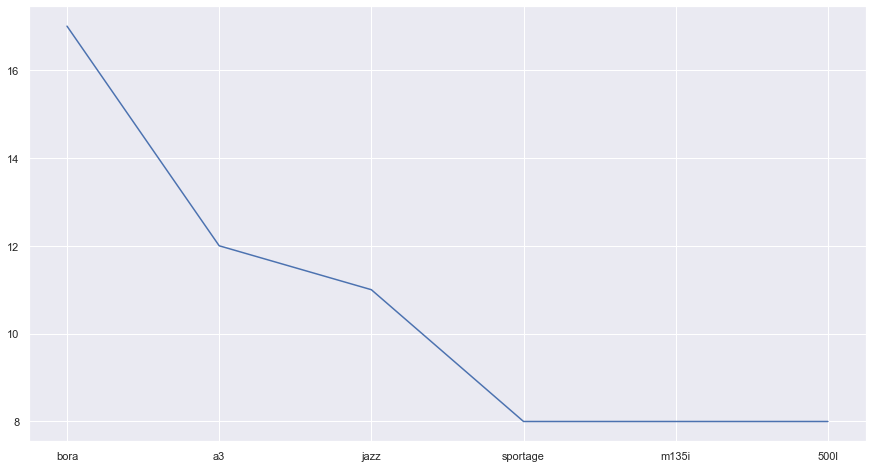

### 4.

Text(0, 0.5, 'Amount')

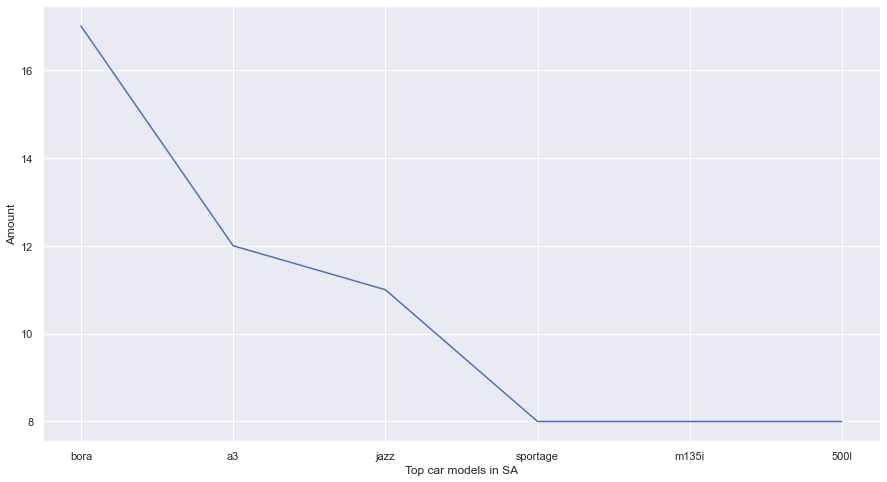

In [116]:
plt.plot(data_SA['model'].value_counts()[0:6])
plt.xlabel("Top car models in SA")
plt.ylabel("Amount")

In [124]:
dataset['mpg'][dataset['model'] == 'hilux'].iloc[0]


24.6

In [121]:
dataset['mpg'][dataset['model'] == 'pajero'].iloc[1]

nan

In [122]:
dataset['mpg'][dataset['model'] == 'city'].iloc[0]

nan

In [123]:
dataset['currency'].unique()

array([None, '$', '£', '€', 'AU$', 'CA$', 'din.', '₴', 'MKD', 'kn', 'NZ$',
       'Fr.', 'BGN', 'B/.', 'ZWL', 'S$', 'man.', 'zł', 'KHR', 'CO$',
       'BYN', 'GTQ', 'RUB', '₪', 'RM', '¥', '₩', 'Ft', 'MTn', 'ZMW',
       'CN¥', 'MXN', 'AR$', 'FCFA', 'Kč', 'VT', 'BN$', 'RON', 'CL$',
       'PKRs', 'R', 'SR', 'HK$', 'GEL', 'BS$', 'Af', 'KM', 'Skr', 'KY$',
       'JD', 'Rs', 'AED', 'Bs.F.', 'S/.', '₡', 'Ksh', 'Dkr', 'TL', 'MMK',
       'ALL', '₫', 'TMT', 'LB£', 'R$', 'IRR', '฿', 'Nkr', 'CU$', 'QR',
       'Kz', 'YR', 'NT$', 'RD$', 'Rp', 'LE', 'CV$'], dtype=object)

### Question - 4.2.6 and 4.2.7

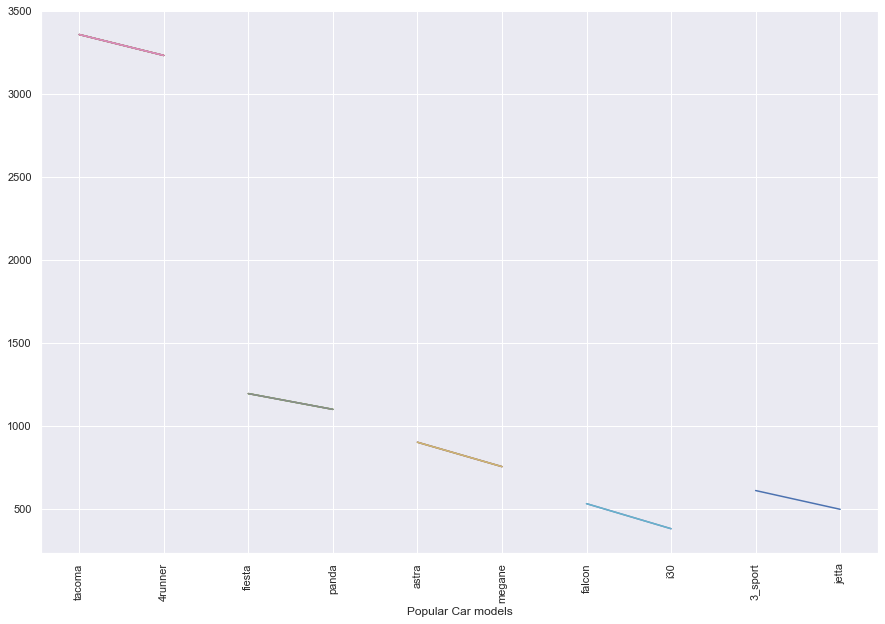

In [128]:
fig = plt.figure(figsize=(15,10))
plt.xlabel("Popular Car models")
data_i = []
for i in dataset['currency'].unique()[0:6]:
    data_i.append(dataset[dataset['currency'] == i])
    for j in data_i:
        plt.plot(j['model'].value_counts()[0:2])
        plt.xticks(rotation = 90)

### Question - 4.2.8

<AxesSubplot:>

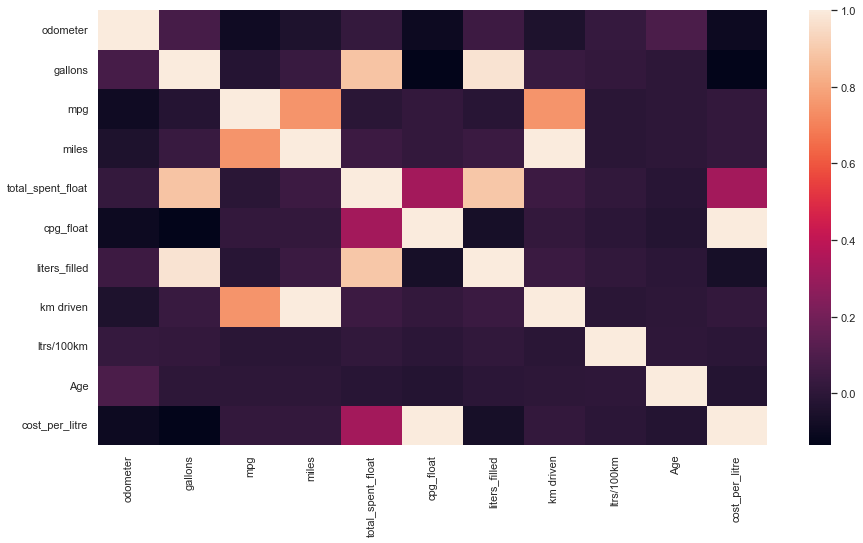

In [130]:
sns.heatmap(dataset.corr())

71762